# Auditory Perceptual Framing Analysis Script (2021). Click discrimination task.
## Pupil info extract

# 0.  Load pupil data participants


In [ ]:
# Select participants
#select_subj = [2] 
#choiceNameFrames = list()

#for i in np.arange(len(select_subj)):
choiceNameFrames1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pupil data/Output/eyeData_pilots_1_41_blinkSacc_XYinfo_100hz.txt')

In [ ]:
choiceNameFrames1

# Modify input so it can constructed as dataframe

In [ ]:
# replace elements in txt to allow separation to dataframe
f1 = open(choiceNameFrames1[0], 'r')
f2 = open('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pupil data/Output/eye_infoFull_report_fix_blink_100Hz.txt', 'w')
for line in f1:
    if line.find('TRACKER_TIME')>-1:
        tracker_idx = line.find('TRACKER_TIME')
        semicol_idx = line.find(';')
        
        if semicol_idx>-1: # if there is a semicolon, i.e. there is another event in the line, delete an leave the other event
            to_remove = line[tracker_idx:semicol_idx+1]
            line = line.replace(to_remove, '')
        else: # if there us only a tracker event
            to_remove = line[tracker_idx:tracker_idx+27]
            line = line.replace(to_remove, '.')

        #remove lines that cause trouble for inclusion in dataframe later
        print('Changed LINE')
        print(line)
        
        f2.write(line)

    else:
        if '!MODE RECORD CR 500 2 1 R' in line:
            f2.write(line.replace('!MODE RECORD CR 500 2 1 R', '!MODE_RECORD_CR_500_2_1_R'))
        else:
            f2.write(line.replace('!MODE RECORD CR 500 2 1 L', '!MODE_RECORD_CR_500_2_1_L'))

f1.close()
f2.close()

-----------------------

# 0.5 Load modified pupil info

In [96]:
pupilDF1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pupil data/Output/eye_infoFull_report_fix_blink_100Hz.txt')
pupilInfo = pd.read_csv(pupilDF1[0],sep='\t')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,RIGHT_IN_SACCADE,LEFT_IN_SACCADE,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y
0,Pilot21,1,.,2747.00,!MODE_RECORD_CR_500_2_1_L,785313.0,785313,.,0,507.30,365.00,.,.
1,Pilot21,1,.,2758.00,.,785323.0,785313,.,0,508.80,363.40,.,.
2,Pilot21,1,.,2770.00,.,785333.0,785313,.,0,510.10,361.10,.,.
3,Pilot21,1,.,2788.00,.,785343.0,785313,.,0,511.30,358.70,.,.
4,Pilot21,1,.,2790.00,.,785353.0,785313,.,0,512.20,358.90,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831786,Pilot41,200,1253.00,.,.,10205455.0,10195915,1,.,.,.,633.40,753.30
7831787,Pilot41,200,1128.00,.,.,10205465.0,10195915,1,.,.,.,599.80,772.70
7831788,Pilot41,200,1100.00,.,SLIDER_KEYB_ACCEPT,10205475.0,10195915,1,.,.,.,569.90,723.80
7831789,Pilot41,200,1151.00,.,.,10205485.0,10195915,1,.,.,.,563.60,668.70


In [98]:
np.unique(pupilInfo.RECORDING_SESSION_LABEL)

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot14',
       'Pilot15', 'Pilot16', 'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20',
       'Pilot21', 'Pilot22', 'Pilot23', 'Pilot24', 'Pilot25', 'Pilot26',
       'Pilot27', 'Pilot28', 'Pilot29', 'Pilot3', 'Pilot30', 'Pilot31',
       'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37', 'Pilot38',
       'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5', 'Pilot6',
       'Pilot7', 'Pilot8', 'Pilot9', 'pilot1', 'pilot2'], dtype=object)

---------------------------

# 1. Preliminar analysis 

# reject participants 

In [99]:

# rejected participants

rej_part0 = ['pilot1','pilot2','Pilot3'] # reject pilot participants
rej_part00 = ['Pilot6', 'Pilot7', 'Pilot14', 'Pilot16', 'Pilot26', 'Pilot28'] # rejected by accuracy 

#rej_partByBlink = ['Pilot19', 'Pilot22', 'Pilot30', 'Pilot38']
rej_partByBlink = []

rej_part = rej_part0 + rej_part00 + rej_partByBlink

In [100]:
rej_part

['pilot1',
 'pilot2',
 'Pilot3',
 'Pilot6',
 'Pilot7',
 'Pilot14',
 'Pilot16',
 'Pilot26',
 'Pilot28']

In [101]:
for j in rej_part:
    pupilInfo = pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL'] !=  j)]

In [102]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,RIGHT_IN_SACCADE,LEFT_IN_SACCADE,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y
0,Pilot21,1,.,2747.00,!MODE_RECORD_CR_500_2_1_L,785313.0,785313,.,0,507.30,365.00,.,.
1,Pilot21,1,.,2758.00,.,785323.0,785313,.,0,508.80,363.40,.,.
2,Pilot21,1,.,2770.00,.,785333.0,785313,.,0,510.10,361.10,.,.
3,Pilot21,1,.,2788.00,.,785343.0,785313,.,0,511.30,358.70,.,.
4,Pilot21,1,.,2790.00,.,785353.0,785313,.,0,512.20,358.90,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831786,Pilot41,200,1253.00,.,.,10205455.0,10195915,1,.,.,.,633.40,753.30
7831787,Pilot41,200,1128.00,.,.,10205465.0,10195915,1,.,.,.,599.80,772.70
7831788,Pilot41,200,1100.00,.,SLIDER_KEYB_ACCEPT,10205475.0,10195915,1,.,.,.,569.90,723.80
7831789,Pilot41,200,1151.00,.,.,10205485.0,10195915,1,.,.,.,563.60,668.70


In [103]:
len(pupilInfo['RECORDING_SESSION_LABEL'].unique())

32

In [104]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,RIGHT_IN_SACCADE,LEFT_IN_SACCADE,LEFT_GAZE_X,LEFT_GAZE_Y,RIGHT_GAZE_X,RIGHT_GAZE_Y
0,Pilot21,1,.,2747.00,!MODE_RECORD_CR_500_2_1_L,785313.0,785313,.,0,507.30,365.00,.,.
1,Pilot21,1,.,2758.00,.,785323.0,785313,.,0,508.80,363.40,.,.
2,Pilot21,1,.,2770.00,.,785333.0,785313,.,0,510.10,361.10,.,.
3,Pilot21,1,.,2788.00,.,785343.0,785313,.,0,511.30,358.70,.,.
4,Pilot21,1,.,2790.00,.,785353.0,785313,.,0,512.20,358.90,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831786,Pilot41,200,1253.00,.,.,10205455.0,10195915,1,.,.,.,633.40,753.30
7831787,Pilot41,200,1128.00,.,.,10205465.0,10195915,1,.,.,.,599.80,772.70
7831788,Pilot41,200,1100.00,.,SLIDER_KEYB_ACCEPT,10205475.0,10195915,1,.,.,.,569.90,723.80
7831789,Pilot41,200,1151.00,.,.,10205485.0,10195915,1,.,.,.,563.60,668.70


## Notice some pilots have pupil information of the left eye and other of the right eye. Put them both in a single column

In [105]:
pupilInfo['pupilSizeAll'] = pd.to_numeric(pupilInfo['RIGHT_PUPIL_SIZE'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_PUPIL_SIZE'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_PUPIL_SIZE', 'LEFT_PUPIL_SIZE'])

pupilInfo['saccAll'] = pd.to_numeric(pupilInfo['RIGHT_IN_SACCADE'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_IN_SACCADE'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_IN_SACCADE', 'LEFT_IN_SACCADE'])

In [106]:
pupilInfo['gazeXAll'] = pd.to_numeric(pupilInfo['RIGHT_GAZE_X'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_GAZE_X'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_GAZE_X', 'LEFT_GAZE_X'])

pupilInfo['gazeYAll'] = pd.to_numeric(pupilInfo['RIGHT_GAZE_Y'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_GAZE_Y'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_GAZE_Y', 'LEFT_GAZE_Y'])

## sort participants within dataframe

In [107]:
pupilInfo = pupilInfo.sort_values(by=['RECORDING_SESSION_LABEL', 'TRIAL_INDEX','TIMESTAMP'])
pupilInfo = pupilInfo.reset_index(drop=True)

In [108]:
#pupilInfo

In [109]:
pupilInfo.RECORDING_SESSION_LABEL.unique()

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot15',
       'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20', 'Pilot21', 'Pilot22',
       'Pilot23', 'Pilot24', 'Pilot25', 'Pilot27', 'Pilot29', 'Pilot30',
       'Pilot31', 'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37',
       'Pilot38', 'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5',
       'Pilot8', 'Pilot9'], dtype=object)

In [110]:
#pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot1')].TRIAL_INDEX.unique()


In [111]:
#pupilInfo.RECORDING_SESSION_LABEL.unique()

## remove practice trials (for pilots) (pilots have 20 practice trials) 

In [112]:
pupilInfo = pupilInfo.loc[pupilInfo['TRIAL_INDEX']>20] 
#pupilInfo = pupilInfo.loc[((pupilInfo['TRIAL_INDEX']>20) & ((pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot4') | (pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot5')))  | (pupilInfo['RECORDING_SESSION_LABEL']  == 'Pilot2')] 

pupilInfo = pupilInfo.reset_index(drop = True)

In [113]:
len(pupilInfo.TRIAL_INDEX.unique())

180

In [114]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME,pupilSizeAll,saccAll,gazeXAll,gazeYAll
0,P33x2,21,!MODE_RECORD_CR_500_2_1_R,2856470.0,2856470,3112.0,0.0,516.9,379.6
1,P33x2,21,.,2856480.0,2856470,3118.0,0.0,517.7,379.4
2,P33x2,21,.,2856490.0,2856470,3116.0,0.0,517.1,379.1
3,P33x2,21,.,2856500.0,2856470,3119.0,0.0,517.3,378.4
4,P33x2,21,.,2856510.0,2856470,3117.0,0.0,518.9,378.7
...,...,...,...,...,...,...,...,...,...
5489081,Pilot9,200,.,3224276.0,3215516,1447.0,0.0,553.4,622.8
5489082,Pilot9,200,.,3224286.0,3215516,1448.0,0.0,553.3,621.4
5489083,Pilot9,200,SLIDER_KEYB_ACCEPT,3224296.0,3215516,1457.0,0.0,553.9,620.8
5489084,Pilot9,200,.,3224306.0,3215516,1449.0,0.0,555.1,622.8


In [115]:
pupilInfo.gazeXAll.mean()

482.19484797647436

In [116]:
pupilInfo.gazeYAll.mean()

411.6237870592735

## Center is located in (512, 384) (full resolution 1024 × 768 pixels). I calculate a deviation index, from the center

In [117]:
pupilInfo['devIdx'] = (512 - pupilInfo['gazeXAll'])**2 + (384 - pupilInfo['gazeYAll'])**2 

## Blink (saccade) percent of all pupil time

In [118]:
blinkPerCent = []
for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
    blinkPerCent.append([i,np.sum (np.isnan(pupilInfoPart.saccAll)),np.nansum(pupilInfoPart.saccAll.values), len(pupilInfoPart.saccAll),np.nansum(pupilInfoPart.saccAll.values)/len(pupilInfoPart.saccAll), np.nansum(pupilInfoPart.saccAll.values)/len(pupilInfoPart.saccAll)>0.20])

In [119]:
blinkPerCent=pd.DataFrame(blinkPerCent,columns=['part','NanNum', 'saccNum', 'SampleNum','SaccPercent', 'RemoveYes']) 

In [120]:
blinkPerCent

,part,NanNum,saccNum,SampleNum,SaccPercent,RemoveYes
0,P33x2,0,28022.0,172839,0.162128,False
1,Pilot10,0,41442.0,196601,0.210792,True
2,Pilot11,0,28191.0,173805,0.162199,False
3,Pilot12,0,10247.0,159878,0.064093,False
4,Pilot13,0,22292.0,176897,0.126017,False
5,Pilot15,0,31350.0,181152,0.173059,False
6,Pilot17,0,43243.0,173109,0.249802,True
7,Pilot18,0,32128.0,173377,0.185307,False
8,Pilot19,0,45536.0,168267,0.270618,True
9,Pilot20,0,11739.0,199238,0.058919,False


In [121]:
np.unique(blinkPerCent.loc[blinkPerCent['SaccPercent'] > 0.25].part)

array(['Pilot19', 'Pilot22', 'Pilot30', 'Pilot38'], dtype=object)

# 1.5 . Extract  pupil info surrounding event

In [122]:
indexDF = []

for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    print('Participant.....' + str(i))
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
    for j in pupilInfoPart.TRIAL_INDEX.unique():
        pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]
    
        firstSndDF = pupilInfoPTrial.loc[ (pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('FIRST_SOUND_R')) ]
        choiceDF = pupilInfoPTrial.loc[(pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_FEEDBACK_R')) |(pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_FEEDBACK_L')) ]
        itiDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('ITI_APPEAR')]
        sliderAcceptDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('SLIDER_KEYB_ACCEPT')]
        confBeginDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_BDM_CONF')] # moment confidence screen appears
        
        if firstSndDF.empty | choiceDF.empty | itiDF.empty | sliderAcceptDF.empty | confBeginDF.empty:
            firstSndDF = np.nan
            choiceDF = np.nan
            itiDF = np.nan
            sliderAcceptDF= np.nan
            confBeginDF= np.nan

            # IF THERE IS NO DATA, SKIP THIS TRIAL
            continue
        else:
            firstSndDF = int(firstSndDF.index.values[0])
            choiceDF = int(choiceDF.index.values[0])
            itiDF = int(itiDF.index.values[0])
            sliderAcceptDF= int(sliderAcceptDF.index.values[0])     
            confBeginDF= int(confBeginDF.index.values[0])     # pick the first confidence screen that appears on the trial
        
        indexDF.append([i,j, firstSndDF, choiceDF, itiDF, sliderAcceptDF, confBeginDF]) 
        

Participant.....P33x2
Participant.....Pilot10
Participant.....Pilot11
Participant.....Pilot12
Participant.....Pilot13
Participant.....Pilot15
Participant.....Pilot17
Participant.....Pilot18
Participant.....Pilot19
Participant.....Pilot20
Participant.....Pilot21
Participant.....Pilot22
Participant.....Pilot23
Participant.....Pilot24
Participant.....Pilot25
Participant.....Pilot27
Participant.....Pilot29
Participant.....Pilot30
Participant.....Pilot31
Participant.....Pilot32
Participant.....Pilot34
Participant.....Pilot35
Participant.....Pilot36
Participant.....Pilot37
Participant.....Pilot38
Participant.....Pilot39
Participant.....Pilot4
Participant.....Pilot40
Participant.....Pilot41
Participant.....Pilot5
Participant.....Pilot8
Participant.....Pilot9


In [123]:
indexDF=pd.DataFrame(indexDF,columns=['part','trial', 'firstSndIdx', 'choiceIdx','itiIdx', 'confAcceptIdx','confBeginIdx'])
indexDF

,part,trial,firstSndIdx,choiceIdx,itiIdx,confAcceptIdx,confBeginIdx
0,P33x2,21,207,549,7,1037,850
1,P33x2,22,1249,1515,1048,1955,1817
2,P33x2,23,2166,2312,1966,2706,2614
3,P33x2,24,2917,3052,2717,3588,3353
4,P33x2,25,3798,3973,3598,4566,4275
...,...,...,...,...,...,...,...
5753,Pilot9,196,5484773,5484991,5484572,5485448,5485292
5754,Pilot9,197,5485659,5485988,5485458,5486432,5486290
5755,Pilot9,198,5486644,5486872,5486444,5487325,5487174
5756,Pilot9,199,5487537,5487742,5487337,5488201,5488044


# Extract pupil info around events to check missing samples

In [124]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in indexDF['firstSndIdx'].values.astype(int):
    pupilFirstSnd.append(pupilInfo.iloc[i-100:i+200].pupilSizeAll.values)
    
for i in indexDF['choiceIdx'].values.astype(int):
    pupilChoice.append(pupilInfo.iloc[i-100:i+100].pupilSizeAll.values)
    
for i in indexDF['itiIdx'].values.astype(int):
    pupilIti.append(pupilInfo.iloc[i-5:i+100].pupilSizeAll.values)    

for i in indexDF['confAcceptIdx'].values.astype(int):
    pupilSlider.append(pupilInfo.iloc[i-200:i+1].pupilSizeAll.values)    # if increase more than 10 you can start reading outside the list 
    

## Extract index of trials to remove with more than half of the missing samples around choice 

In [125]:
percentSaccTrial = []
idxPrctSaccTrial  = []

pupilChoInterp = []

for ii in range(len(pupilChoice)):
    pupilTrial  = pupilChoice[ii]
    nonSaccNum = np.sum(pupilTrial>0)
    percentSaccTrial.append(nonSaccNum/len(pupilTrial))
    idxPrctSaccTrial.append((nonSaccNum/len(pupilTrial)) > 0.5)
    
    pupilTrialDF = pd.Series(pupilTrial)
    pupilChoInterp.append(pupilTrialDF.interpolate().values)


print('Proportion trials with more than 50% pupil samples: ' + str(np.sum(np.greater_equal(percentSaccTrial, 0.50))/len(percentSaccTrial))  )

Proportion trials with more than 50% pupil samples: 0.9741229593608892


## Add trials to exclude to the main index dataframe

In [126]:
indexDF['trial2Keep'] = idxPrctSaccTrial

In [127]:
indexDF

,part,trial,firstSndIdx,choiceIdx,itiIdx,confAcceptIdx,confBeginIdx,trial2Keep
0,P33x2,21,207,549,7,1037,850,True
1,P33x2,22,1249,1515,1048,1955,1817,True
2,P33x2,23,2166,2312,1966,2706,2614,True
3,P33x2,24,2917,3052,2717,3588,3353,True
4,P33x2,25,3798,3973,3598,4566,4275,True
...,...,...,...,...,...,...,...,...
5753,Pilot9,196,5484773,5484991,5484572,5485448,5485292,True
5754,Pilot9,197,5485659,5485988,5485458,5486432,5486290,True
5755,Pilot9,198,5486644,5486872,5486444,5487325,5487174,True
5756,Pilot9,199,5487537,5487742,5487337,5488201,5488044,True


----------------------------------

# 2.1 Clean  Blinks according to deGee

## de Gee clean considering independent participants

In [128]:
import scipy.signal
import FIRDeconvolution
from lmfit import minimize, Parameters, Parameter, report_fit

sample_rate = 100.0

#x = np.arange(timepoints.shape[0]) / sample_rate

# margin around propere blink to consider for the interpolation (remember that pupil measure around blink are also lower respect to the rest.
margin = 100 # ms
margin = int((margin*sample_rate)/1000)

# parameters for filters
hp = 0.01
lp = 10.0

# functions to fit kernels
def single_pupil_IRF(params, x):
    s1 = params['s1']
    n1 = params['n1']
    tmax1 = params['tmax1']
    return s1 * ((x**n1) * (np.e**((-n1*x)/tmax1)))

def single_pupil_IRF_ls(params, x, data):
    s1 = params['s1'].value
    n1 = params['n1'].value
    tmax1 = params['tmax1'].value
    model = s1 * ((x**n1) * (np.e**((-n1*x)/tmax1)))
    return model - data

def double_pupil_IRF(params, x):
    s1 = params['s1']
    s2 = params['s2']
    n1 = params['n1']
    n2 = params['n2']
    tmax1 = params['tmax1']
    tmax2 = params['tmax2']
    return s1 * ((x**n1) * (np.e**((-n1*x)/tmax1))) + s2 * ((x**n2) * (np.e**((-n2*x)/tmax2)))

def double_pupil_IRF_ls(params, x, data):
    s1 = params['s1'].value
    s2 = params['s2'].value
    n1 = params['n1'].value
    n2 = params['n2'].value
    tmax1 = params['tmax1'].value
    tmax2 = params['tmax2'].value
    model = s1 * ((x**n1) * (np.e**((-n1*x)/tmax1))) + s2 * ((x**n2) * (np.e**((-n2*x)/tmax2)))
    return model - data




pupil_clean_all = []

# extract each trial pupil information
for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
        print('Participant.....' + str(i))
        pupilInfoPTrial = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
    #for j in pupilInfoPart.TRIAL_INDEX.unique():
        #pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]

        #pupilInfoPTrial = pupilInfoPart.copy()
        
        
        # variables to work with:
        start_time = pupilInfoPTrial.TIMESTAMP.values[0]
        timepoints = pupilInfoPTrial.TIMESTAMP.values - start_time
        pupil = pupilInfoPTrial.pupilSizeAll.values

        sacSeries = pupilInfoPTrial.saccAll.values 
        sac_starts = []
        sac_ends = []
        for kk in range(len(sacSeries)-1):
            if kk< len(sacSeries):
                if (sacSeries[kk] == 1)  and (kk == 0):
                    sac_starts.append(timepoints[kk])
                
                if (sacSeries[kk+1] == 1)  and (kk+1 == len(sacSeries)-1):
                    sac_ends.append(timepoints[kk])
                    
                
                if (sacSeries[kk] == 0) and (sacSeries[kk+1] == 1):
                    sac_starts.append(timepoints[kk+1])
                if (sacSeries[kk] == 1) and (sacSeries[kk+1] == 0):
                    sac_ends.append(timepoints[kk])
                    
        blink_starts = []
        blink_ends = []
        for kk in range(len(pupil)-1):
            if kk< len(pupil):
                if (pupil[kk] ==0)  and (kk == 0):
                    blink_starts.append(timepoints[kk])
               
                if (pupil[kk+1] ==0)  and (kk+1 == len(pupil)-1):
                    blink_ends.append(timepoints[kk])
            
                if (pupil[kk] > 0) and (pupil[kk+1] == 0):
                    blink_starts.append(timepoints[kk+1])
                if (pupil[kk] == 0) and (pupil[kk+1] > 0):
                    blink_ends.append(timepoints[kk])
        
        
        sac_starts = np.array(sac_starts) 
        sac_ends = np.array(sac_starts) 
        blink_starts = np.array(blink_starts) 
        blink_ends = np.array(blink_ends) 
        
        # Interpolating the blinks for each trial
        
        
        pupil_interpolated = np.array(pupil.copy())
        for b in range(blink_starts.shape[0]):
    
    
            blink_start =  np.where(timepoints==blink_starts[b])[0][0]-margin+1
            blink_end =  np.where(timepoints==blink_ends[b])[0][0]+margin+1
            #blink_start =  np.where(timepoints==blink_starts[b])[0][0]
            #blink_end =  np.where(timepoints==blink_ends[b])[0][0]
            
            if blink_start< 0:
                blink_start = 0

            if blink_end > len(pupil_interpolated)-1:
                blink_end = len(pupil_interpolated)-1



            
            interpolated_signal = np.linspace(pupil_interpolated[blink_start], 
                                              pupil_interpolated[blink_end],
                                              blink_end-blink_start,
                                              endpoint=False)
            pupil_interpolated[blink_start:blink_end] = interpolated_signal
        

        # Apply filtering to interpolated pupil signal
        ## We'll construct a low pass (<10Hz), and a band-pass (0.01-10Hz) signal.
        # High pass:
        hp_cof_sample = hp /  (sample_rate / 2)
        bhp, ahp = scipy.signal.butter(3, hp_cof_sample, btype='high')
        pupil_interpolated_hp = scipy.signal.filtfilt(bhp, ahp, pupil_interpolated)
        # Low pass:
        lp_cof_sample = lp / (sample_rate / 2)
        
        blp, alp = scipy.signal.butter(3, lp_cof_sample)
        pupil_interpolated_lp = scipy.signal.filtfilt(blp, alp, pupil_interpolated)
        # Band pass:
        pupil_interpolated_bp = scipy.signal.filtfilt(blp, alp, pupil_interpolated_hp)
                
        
        #The band-pass filtered signal we can use now to estimate pupil responses to blinks and saccades. 
        #You can think of these of simple event related averages. However, to account for temporally adjacent event, 
        #and hence overlapping responses (due to slow pupil IRF), here we will rely on deconvolution.
        
        downsample_rate = 100
        new_sample_rate = sample_rate / downsample_rate
        interval = 6
        
        # events:
        events = [(blink_ends / sample_rate), 
                  (sac_ends / sample_rate)]
        
        # compute blink and sac kernels with deconvolution (on downsampled timeseries):
        a = FIRDeconvolution.FIRDeconvolution(signal=scipy.signal.decimate(pupil_interpolated_bp, downsample_rate, 1), 
                                 events=events, event_names=['blinks', 'sacs'], sample_frequency=new_sample_rate, 
                                 deconvolution_frequency=new_sample_rate, deconvolution_interval=[0,interval],)
        a.create_design_matrix()
        a.regress()
        a.betas_for_events()
        blink_response = np.array(a.betas_per_event_type[0]).ravel()
        sac_response = np.array(a.betas_per_event_type[1]).ravel()
        
        # baseline the kernels:
        blink_response = blink_response - blink_response[0].mean()
        sac_response = sac_response - blink_response[0].mean()
        

        x = np.linspace(0, interval, len(blink_response))

        
        
        # to fit the kernels
        # create a set of Parameters
        params = Parameters()
        params.add('s1', value=-1, min=-np.inf, max=-1e-25)
        params.add('s2', value=1, min=1e-25, max=np.inf)
        params.add('n1', value=10, min=9, max=11)
        params.add('n2', value=10, min=8, max=12)
        params.add('tmax1', value=0.9, min=0.5, max=1.5)
        params.add('tmax2', value=2.5, min=1.5, max=4)
        
        # do fit, here with powell method:
        blink_result = minimize(double_pupil_IRF_ls, params, method='powell', args=(x, blink_response))
        blink_kernel = double_pupil_IRF(blink_result.params, x)
        sac_result = minimize(single_pupil_IRF_ls, params, method='powell', args=(x, sac_response))
        sac_kernel = single_pupil_IRF(sac_result.params, x)
        
        #Now, with a GLM let's regress these responses to blinks and saccades from our pupil timeseries.
        # upsample:
        x = numpy.linspace(0, interval, int(interval*sample_rate))
        blink_kernel = double_pupil_IRF(blink_result.params, x)
        sac_kernel = double_pupil_IRF(sac_result.params, x)
        
        # regressors:
        blink_reg = np.zeros(len(pupil))
        
        b_e = []
        for jj in range(len(blink_ends)):
            b_e.append(np.where(timepoints == blink_ends[jj])[0][0])
        blink_ends = b_e
        
        blink_reg[blink_ends] = 1
        blink_reg_conv = scipy.signal.fftconvolve(blink_reg, blink_kernel, 'full')[:-(len(blink_kernel)-1)]
        sac_reg = np.zeros(len(pupil))
        sac_reg[blink_ends] = 1
        sac_reg_conv = scipy.signal.fftconvolve(sac_reg, sac_kernel, 'full')[:-(len(sac_kernel)-1)]
        regs = [blink_reg_conv, sac_reg_conv]
        
        # GLM:
        design_matrix = np.matrix(np.vstack([reg for reg in regs])).T
        betas = np.array(((design_matrix.T * design_matrix).I * design_matrix.T) * np.matrix(pupil_interpolated_bp).T).ravel()
        explained = np.sum(np.vstack([betas[i]*regs[i] for i in range(len(betas))]), axis=0)
        
        # clean pupil:
        pupil_clean_bp = pupil_interpolated_bp - explained
        
        pupil_clean_lp = pupil_clean_bp + (pupil_interpolated_lp-pupil_interpolated_bp)

        pupil_clean_all = np.append(pupil_clean_all, pupil_clean_lp)
        
pupilCorrected =    pupil_clean_all 

Participant.....P33x2


/Users/pradyumna/Documents/GiTs/pupilPEB2021/PupilClicks_FullParticipants/FIRDeconvolution.py:226: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.betas, residuals_sum, rank, s = LA.lstsq(self.design_matrix.T, self.resampled_signal.T)


Participant.....Pilot10
Participant.....Pilot11
Participant.....Pilot12
Participant.....Pilot13
Participant.....Pilot15
Participant.....Pilot17
Participant.....Pilot18
Participant.....Pilot19
Participant.....Pilot20
Participant.....Pilot21
Participant.....Pilot22
Participant.....Pilot23
Participant.....Pilot24
Participant.....Pilot25
Participant.....Pilot27
Participant.....Pilot29
Participant.....Pilot30
Participant.....Pilot31
Participant.....Pilot32
Participant.....Pilot34
Participant.....Pilot35
Participant.....Pilot36
Participant.....Pilot37
Participant.....Pilot38
Participant.....Pilot39
Participant.....Pilot4
Participant.....Pilot40
Participant.....Pilot41
Participant.....Pilot5
Participant.....Pilot8
Participant.....Pilot9


## de Gee clean for each trial

In [129]:
#import scipy.signal
#import FIRDeconvolution
#from lmfit import minimize, Parameters, Parameter, report_fit
#
#sample_rate = 100.0
#
##x = np.arange(timepoints.shape[0]) / sample_rate
#
## margin around propere blink to consider for the interpolation (remember that pupil measure around blink are also lower respect to the rest.
#margin = 100 # ms
#margin = int((margin*sample_rate)/1000)
#
## parameters for filters
#hp = 0.01
#lp = 10.0
#
## functions to fit kernels
#def single_pupil_IRF(params, x):
#    s1 = params['s1']
#    n1 = params['n1']
#    tmax1 = params['tmax1']
#    return s1 * ((x**n1) * (np.e**((-n1*x)/tmax1)))
#
#def single_pupil_IRF_ls(params, x, data):
#    s1 = params['s1'].value
#    n1 = params['n1'].value
#    tmax1 = params['tmax1'].value
#    model = s1 * ((x**n1) * (np.e**((-n1*x)/tmax1)))
#    return model - data
#
#def double_pupil_IRF(params, x):
#    s1 = params['s1']
#    s2 = params['s2']
#    n1 = params['n1']
#    n2 = params['n2']
#    tmax1 = params['tmax1']
#    tmax2 = params['tmax2']
#    return s1 * ((x**n1) * (np.e**((-n1*x)/tmax1))) + s2 * ((x**n2) * (np.e**((-n2*x)/tmax2)))
#
#def double_pupil_IRF_ls(params, x, data):
#    s1 = params['s1'].value
#    s2 = params['s2'].value
#    n1 = params['n1'].value
#    n2 = params['n2'].value
#    tmax1 = params['tmax1'].value
#    tmax2 = params['tmax2'].value
#    model = s1 * ((x**n1) * (np.e**((-n1*x)/tmax1))) + s2 * ((x**n2) * (np.e**((-n2*x)/tmax2)))
#    return model - data
#
#
#
#
#pupil_clean_all = []
#
## extract each trial pupil information
#for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
#    print('Participant.....' + str(i))
#    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
#    for j in pupilInfoPart.TRIAL_INDEX.unique():
#        pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]
#
#        #pupilInfoPTrial = pupilInfoPart.copy()
#        
#        
#        # variables to work with:
#        start_time = pupilInfoPTrial.TIMESTAMP.values[0]
#        timepoints = pupilInfoPTrial.TIMESTAMP.values - start_time
#        pupil = pupilInfoPTrial.pupilSizeAll.values
#
#        sacSeries = pupilInfoPTrial.saccAll.values 
#        sac_starts = []
#        sac_ends = []
#        for kk in range(len(sacSeries)-1):
#            if kk< len(sacSeries):
#                if (sacSeries[kk] == 1)  and (kk == 0):
#                    sac_starts.append(timepoints[kk])
#                
#                if (sacSeries[kk+1] == 1)  and (kk+1 == len(sacSeries)-1):
#                    sac_ends.append(timepoints[kk])
#                    
#                
#                if (sacSeries[kk] == 0) and (sacSeries[kk+1] == 1):
#                    sac_starts.append(timepoints[kk+1])
#                if (sacSeries[kk] == 1) and (sacSeries[kk+1] == 0):
#                    sac_ends.append(timepoints[kk])
#                    
#        blink_starts = []
#        blink_ends = []
#        for kk in range(len(pupil)-1):
#            if kk< len(pupil):
#                if (pupil[kk] ==0)  and (kk == 0):
#                    blink_starts.append(timepoints[kk])
#               
#                if (pupil[kk+1] ==0)  and (kk+1 == len(pupil)-1):
#                    blink_ends.append(timepoints[kk])
#            
#                if (pupil[kk] > 0) and (pupil[kk+1] == 0):
#                    blink_starts.append(timepoints[kk+1])
#                if (pupil[kk] == 0) and (pupil[kk+1] > 0):
#                    blink_ends.append(timepoints[kk])
#        
#        
#        sac_starts = np.array(sac_starts) 
#        sac_ends = np.array(sac_starts) 
#        blink_starts = np.array(blink_starts) 
#        blink_ends = np.array(blink_ends) 
#        
#        # Interpolating the blinks for each trial
#        
#        
#        pupil_interpolated = np.array(pupil.copy())
#        for b in range(blink_starts.shape[0]):
#    
#    
#            blink_start =  np.where(timepoints==blink_starts[b])[0][0]-margin+1
#            blink_end =  np.where(timepoints==blink_ends[b])[0][0]+margin+1
#            #blink_start =  np.where(timepoints==blink_starts[b])[0][0]
#            #blink_end =  np.where(timepoints==blink_ends[b])[0][0]
#            
#            if blink_start< 0:
#                blink_start = 0
#
#            if blink_end > len(pupil_interpolated)-1:
#                blink_end = len(pupil_interpolated)-1
#
#
#
#            
#            interpolated_signal = np.linspace(pupil_interpolated[blink_start], 
#                                              pupil_interpolated[blink_end],
#                                              blink_end-blink_start,
#                                              endpoint=False)
#            pupil_interpolated[blink_start:blink_end] = interpolated_signal
#        
#
#        # Apply filtering to interpolated pupil signal
#        ## We'll construct a low pass (<10Hz), and a band-pass (0.01-10Hz) signal.
#        # High pass:
#        hp_cof_sample = hp /  (sample_rate / 2)
#        bhp, ahp = scipy.signal.butter(3, hp_cof_sample, btype='high')
#        pupil_interpolated_hp = scipy.signal.filtfilt(bhp, ahp, pupil_interpolated)
#        # Low pass:
#        lp_cof_sample = lp / (sample_rate / 2)
#        
#        blp, alp = scipy.signal.butter(3, lp_cof_sample)
#        pupil_interpolated_lp = scipy.signal.filtfilt(blp, alp, pupil_interpolated)
#        # Band pass:
#        pupil_interpolated_bp = scipy.signal.filtfilt(blp, alp, pupil_interpolated_hp)
#                
#        
#        #The band-pass filtered signal we can use now to estimate pupil responses to blinks and saccades. 
#        #You can think of these of simple event related averages. However, to account for temporally adjacent event, 
#        #and hence overlapping responses (due to slow pupil IRF), here we will rely on deconvolution.
#        
#        downsample_rate = 100
#        new_sample_rate = sample_rate / downsample_rate
#        interval = 6
#        
#        # events:
#        events = [(blink_ends / sample_rate), 
#                  (sac_ends / sample_rate)]
#        
#        # compute blink and sac kernels with deconvolution (on downsampled timeseries):
#        a = FIRDeconvolution.FIRDeconvolution(signal=scipy.signal.decimate(pupil_interpolated_bp, downsample_rate, 1), 
#                                 events=events, event_names=['blinks', 'sacs'], sample_frequency=new_sample_rate, 
#                                 deconvolution_frequency=new_sample_rate, deconvolution_interval=[0,interval],)
#        a.create_design_matrix()
#        a.regress()
#        a.betas_for_events()
#        blink_response = np.array(a.betas_per_event_type[0]).ravel()
#        sac_response = np.array(a.betas_per_event_type[1]).ravel()
#        
#        # baseline the kernels:
#        blink_response = blink_response - blink_response[0].mean()
#        sac_response = sac_response - blink_response[0].mean()
#        
#
#        x = np.linspace(0, interval, len(blink_response))
#
#        
#        
#        # to fit the kernels
#        # create a set of Parameters
#        params = Parameters()
#        params.add('s1', value=-1, min=-np.inf, max=-1e-25)
#        params.add('s2', value=1, min=1e-25, max=np.inf)
#        params.add('n1', value=10, min=9, max=11)
#        params.add('n2', value=10, min=8, max=12)
#        params.add('tmax1', value=0.9, min=0.5, max=1.5)
#        params.add('tmax2', value=2.5, min=1.5, max=4)
#        
#        # do fit, here with powell method:
#        blink_result = minimize(double_pupil_IRF_ls, params, method='powell', args=(x, blink_response))
#        blink_kernel = double_pupil_IRF(blink_result.params, x)
#        sac_result = minimize(single_pupil_IRF_ls, params, method='powell', args=(x, sac_response))
#        sac_kernel = single_pupil_IRF(sac_result.params, x)
#        
#        #Now, with a GLM let's regress these responses to blinks and saccades from our pupil timeseries.
#        # upsample:
#        x = numpy.linspace(0, interval, int(interval*sample_rate))
#        blink_kernel = double_pupil_IRF(blink_result.params, x)
#        sac_kernel = double_pupil_IRF(sac_result.params, x)
#        
#        # regressors:
#        blink_reg = np.zeros(len(pupil))
#        
#        b_e = []
#        for jj in range(len(blink_ends)):
#            b_e.append(np.where(timepoints == blink_ends[jj])[0][0])
#        blink_ends = b_e
#        
#        blink_reg[blink_ends] = 1
#        blink_reg_conv = scipy.signal.fftconvolve(blink_reg, blink_kernel, 'full')[:-(len(blink_kernel)-1)]
#        sac_reg = np.zeros(len(pupil))
#        sac_reg[blink_ends] = 1
#        sac_reg_conv = scipy.signal.fftconvolve(sac_reg, sac_kernel, 'full')[:-(len(sac_kernel)-1)]
#        regs = [blink_reg_conv, sac_reg_conv]
#        
#        # GLM:
#        design_matrix = np.matrix(np.vstack([reg for reg in regs])).T
#        betas = np.array(((design_matrix.T * design_matrix).I * design_matrix.T) * np.matrix(pupil_interpolated_bp).T).ravel()
#        explained = np.sum(np.vstack([betas[i]*regs[i] for i in range(len(betas))]), axis=0)
#        
#        # clean pupil:
#        pupil_clean_bp = pupil_interpolated_bp - explained
#        
#        pupil_clean_lp = pupil_clean_bp + (pupil_interpolated_lp-pupil_interpolated_bp)
#
#        pupil_clean_all = np.append(pupil_clean_all, pupil_clean_lp)
#        
#pupilCorrected =    pupil_clean_all 

f = plt.figure(figsize = (10,3.5))
plt.plot(pupilInfoPart.pupilSizeAll[10000:20000])
plt.xlabel('Time (s)')
pl.ylabel('Pupil size')
sns.despine(offset=10)

import sys


pupil_interpolated = np.array(pupil.copy())
for b in range(blink_starts.shape[0]):
    
    
    blink_start =  np.where(timepoints==blink_starts[b])[0][0]-margin+1
    blink_end =  np.where(timepoints==blink_ends[b])[0][0]+margin+1
    #blink_start =  np.where(timepoints==blink_starts[b])[0][0]
    #blink_end =  np.where(timepoints==blink_ends[b])[0][0]
    
    if blink_start< 0:
        blink_start = 0
        
    
    interpolated_signal = np.linspace(pupil_interpolated[blink_start], 
                                      pupil_interpolated[blink_end],
                                      blink_end-blink_start,
                                      endpoint=False)
    pupil_interpolated[blink_start:blink_end] = interpolated_signal
f = plt.figure(figsize = (10,3.5))
plt.plot(x, pupil_interpolated)
plt.xlabel('Time (s)')
pl.ylabel('Pupil size')
sns.despine(offset=10)

import scipy.signal
x = np.arange(timepoints.shape[0]) / sample_rate

#----

hp = 0.01
lp = 10.0


# High pass:
hp_cof_sample = hp /  (sample_rate / 2)
bhp, ahp = scipy.signal.butter(3, hp_cof_sample, btype='high')
pupil_interpolated_hp = scipy.signal.filtfilt(bhp, ahp, pupil_interpolated)
# Low pass:
lp_cof_sample = lp / (sample_rate / 2)

blp, alp = scipy.signal.butter(3, lp_cof_sample)
pupil_interpolated_lp = scipy.signal.filtfilt(blp, alp, pupil_interpolated)
# Band pass:
pupil_interpolated_bp = scipy.signal.filtfilt(blp, alp, pupil_interpolated_hp)

f = plt.figure(figsize = (10,3.5))

plt.plot(x, pupil_interpolated_lp, label='low pass')
plt.plot(x, pupil_interpolated_bp, label='band pass')
plt.xlabel('Time (s)')
plt.ylabel('Pupil size')
plt.legend()

sns.despine(offset=10)

import FIRDeconvolution
from lmfit import minimize, Parameters, Parameter, report_fit


downsample_rate = 100
new_sample_rate = sample_rate / downsample_rate
interval = 6

# events:
events = [(blink_ends / sample_rate), 
          (sac_ends / sample_rate)]

# compute blink and sac kernels with deconvolution (on downsampled timeseries):
a = FIRDeconvolution.FIRDeconvolution(signal=scipy.signal.decimate(pupil_interpolated_bp, downsample_rate, 1), 
                         events=events, event_names=['blinks', 'sacs'], sample_frequency=new_sample_rate, 
                         deconvolution_frequency=new_sample_rate, deconvolution_interval=[0,interval],)
a.create_design_matrix()
a.regress()
a.betas_for_events()
blink_response = np.array(a.betas_per_event_type[0]).ravel()
sac_response = np.array(a.betas_per_event_type[1]).ravel()

# baseline the kernels:
blink_response = blink_response - blink_response[0].mean()
sac_response = sac_response - blink_response[0].mean()

# plot:
x = np.linspace(0, interval, len(blink_response))

f = plt.figure(figsize = (10,3.5))

plt.plot(x, blink_response, label='blink response')
plt.plot(x, sac_response, label='sac response')
plt.xlabel('Time from event (s)')
plt.ylabel('Pupil size')
plt.axhline(0,color = 'k', lw = 0.5, alpha = 0.5)
plt.legend(loc=2)
sns.despine(offset=10)

def single_pupil_IRF(params, x):
    s1 = params['s1']
    n1 = params['n1']
    tmax1 = params['tmax1']
    return s1 * ((x**n1) * (np.e**((-n1*x)/tmax1)))

def single_pupil_IRF_ls(params, x, data):
    s1 = params['s1'].value
    n1 = params['n1'].value
    tmax1 = params['tmax1'].value
    model = s1 * ((x**n1) * (np.e**((-n1*x)/tmax1)))
    return model - data

def double_pupil_IRF(params, x):
    s1 = params['s1']
    s2 = params['s2']
    n1 = params['n1']
    n2 = params['n2']
    tmax1 = params['tmax1']
    tmax2 = params['tmax2']
    return s1 * ((x**n1) * (np.e**((-n1*x)/tmax1))) + s2 * ((x**n2) * (np.e**((-n2*x)/tmax2)))

def double_pupil_IRF_ls(params, x, data):
    s1 = params['s1'].value
    s2 = params['s2'].value
    n1 = params['n1'].value
    n2 = params['n2'].value
    tmax1 = params['tmax1'].value
    tmax2 = params['tmax2'].value
    model = s1 * ((x**n1) * (np.e**((-n1*x)/tmax1))) + s2 * ((x**n2) * (np.e**((-n2*x)/tmax2)))
    return model - data

# create a set of Parameters
params = Parameters()
params.add('s1', value=-1, min=-np.inf, max=-1e-25)
params.add('s2', value=1, min=1e-25, max=np.inf)
params.add('n1', value=10, min=9, max=11)
params.add('n2', value=10, min=8, max=12)
params.add('tmax1', value=0.9, min=0.5, max=1.5)
params.add('tmax2', value=2.5, min=1.5, max=4)

# do fit, here with powell method:
blink_result = minimize(double_pupil_IRF_ls, params, method='powell', args=(x, blink_response))
blink_kernel = double_pupil_IRF(blink_result.params, x)
sac_result = minimize(single_pupil_IRF_ls, params, method='powell', args=(x, sac_response))
sac_kernel = single_pupil_IRF(sac_result.params, x)

# plot:
f = plt.figure(figsize = (10,3.5))

plt.plot(x, blink_response, label='blink response')
plt.plot(x, blink_kernel, label='blink fit')
plt.plot(x, sac_response, label='sac response')
plt.plot(x, sac_kernel, label='sac fit')

plt.xlabel('Time from event (s)')
plt.ylabel('Pupil size')
plt.axhline(0,color = 'k', lw = 0.5, alpha = 0.5)
plt.legend(loc=4)
sns.despine(offset=10)

# upsample:
x = numpy.linspace(0, interval, int(interval*sample_rate))
blink_kernel = double_pupil_IRF(blink_result.params, x)
sac_kernel = double_pupil_IRF(sac_result.params, x)

# regressors:
blink_reg = np.zeros(len(pupil))

b_e = []
for jj in range(len(blink_ends)):
    b_e.append(np.where(timepoints == blink_ends[jj])[0][0])
blink_ends = b_e

blink_reg[blink_ends] = 1
blink_reg_conv = scipy.signal.fftconvolve(blink_reg, blink_kernel, 'full')[:-(len(blink_kernel)-1)]
sac_reg = np.zeros(len(pupil))
sac_reg[blink_ends] = 1
sac_reg_conv = scipy.signal.fftconvolve(sac_reg, sac_kernel, 'full')[:-(len(sac_kernel)-1)]
regs = [blink_reg_conv, sac_reg_conv]

# GLM:
design_matrix = np.matrix(np.vstack([reg for reg in regs])).T
betas = np.array(((design_matrix.T * design_matrix).I * design_matrix.T) * np.matrix(pupil_interpolated_bp).T).ravel()
explained = np.sum(np.vstack([betas[i]*regs[i] for i in range(len(betas))]), axis=0)

# clean pupil:
pupil_clean_bp = pupil_interpolated_bp - explained

# plot:
f = plt.figure(figsize = (10,3.5))

x = np.arange(timepoints.shape[0]) / sample_rate
plt.plot(x, pupil_interpolated_bp, label='band-passed')
plt.plot(x, pupil_clean_bp, label='blinks/sacs regressed out')

plt.xlabel('Time (s)')
plt.ylabel('Pupil size')
plt.axhline(0,color = 'k', lw = 0.5, alpha = 0.5)
plt.legend()
sns.despine(offset=10)

pupil_clean_lp = pupil_clean_bp + (pupil_interpolated_lp-pupil_interpolated_bp)

f = plt.figure(figsize = (10,3.5))

x = np.arange(timepoints.shape[0]) / sample_rate
plt.plot(x, pupil_interpolated, label='band-passed')
plt.plot(x, pupil_clean_lp, label='blinks/sacs regressed out')

plt.xlabel('Time (s)')
plt.ylabel('Pupil size')
plt.axhline(0,color = 'k', lw = 0.5, alpha = 0.5)
plt.legend()
sns.despine(offset=10)

# 2.1 Clean  Blinks

Notice that blinks are including inside the indicator of saccades as created by EyeLink dataviewer

In [130]:
## pupilCorrected = []
## i = 0
## totalNPupil  = len(pupilInfo)
## porcnt = 1
## while i < len(pupilInfo):
##     currInfo = pupilInfo.iloc[i]
##     currSacc = currInfo.saccAll    
##     
##     if currSacc == 0: # if this trial is not saccade (or blink)
##         pupilCorrected.append(currInfo.pupilSizeAll)
##         i += 1
##         continue
##     else:
##         pupilBegin = pupilInfo.iloc[i-1].pupilSizeAll
##         iBegin = i 
##         while pupilInfo.iloc[i].saccAll == 1:
##             i += 1
##             
##         pupilEnd = pupilInfo.iloc[i].pupilSizeAll
##         iEnd = i 
##         
##         interpolPupil = []
##         for ii in range(iEnd-iBegin):
##             
##             interpolPupil.append(pupilBegin + (ii - iBegin)/(iEnd-iBegin)*(pupilEnd -pupilBegin )) 
##         
##         pupilCorrected.extend(interpolPupil)
##         pupilCorrected.append(pupilInfo.iloc[i].pupilSizeAll)
##     
## 
##     
##     if i > totalNPupil*(0.05*porcnt):
##         print('5% done')
##         porcnt += 1
##         

In [131]:
#pupilBlinkedSacc = pupilInfo.pupilSizeAll * (1 - pupilInfo.saccAll)
#pupilBlinkedSacc = pupilBlinkedSacc.replace(0, np.nan)
#pupilCorrected = pupilBlinkedSacc
##pupilInfo['pupilSizeAllRaw'] = pupilCorrected.pupilSizeAll

# 2.2. Apply bandpass filter on pupil signal

# Interpolate

In [132]:
#pupilBlinkedSacc = pupilInfo.pupilSizeAll * (1 - pupilInfo.saccAll)
#pupilBlinkedSacc = pupilBlinkedSacc.replace(0, np.nan)
#pupilCorrected = pupilBlinkedSacc.interpolate()
#pupilInfo['pupilSizeAllRaw'] = pupilCorrected.pupilSizeAll

# 2.3 Z-score each trial pupil info and calculate deviation index (to account for eye movements)

In [133]:
#from scipy.signal import butter, lfilter
#from scipy.signal import freqz
#
#def butter_bandpass(lowcut, highcut, fs, order=2): # butterworth filter second order as used in Urai et al., 2017 (Nature Comms.)
#    nyq = 0.5 * fs
#    low = lowcut / nyq
#    high = highcut / nyq
#    b, a = butter(order, [low, high], btype='band')
#    return b, a
#
#
#def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
#    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#    y = lfilter(b, a, data)
#    return y
#
## Sample rate and desired cutoff frequencies (in Hz).
#fs = 100.0
#lowcut = 0.02
#highcut = 4
#
#b, a = butter_bandpass(lowcut, highcut, fs, order = 2 )
#pupilCorrected = butter_bandpass_filter(pupilCorrected.values, lowcut, highcut, fs, order=2)

In [134]:
pupilInfo['pupilSizeBlinkInterp'] = pupilCorrected

In [138]:
zPupil = []
zDevIdxSample = []
zDevIdxTrial = []
zXposTrial = []
zYposTrial = []


for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    print('Participant.....' + str(i))
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]

    for j in pupilInfoPart.TRIAL_INDEX.unique():
            pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]            
            
            # pupil size
            pupilTrial = pupilInfoPTrial.pupilSizeBlinkInterp.values
            zPupilInfoPTrial = (pupilTrial - np.nanmean(pupilTrial))/np.nanstd(pupilTrial)       
      
            zPupil.extend(zPupilInfoPTrial) 
        
            # eye displacement using the deviation index is normalized using median value for trial (as in Lempert et al., 2015)
            devIdxTrial = pupilInfoPTrial.devIdx.values
            zDevIdxInfoPTrial = (devIdxTrial / np.median(devIdxTrial))   
            
            # extract X and Y samples (additional analysis)
            XIdxTrial = pupilInfoPTrial.gazeXAll.values
            zXIdxInfoPTrial = (XIdxTrial - np.nanmean(XIdxTrial)) / np.nanstd(devIdxTrial)  
            
            YIdxTrial = pupilInfoPTrial.gazeYAll.values
            zYIdxInfoPTrial = (YIdxTrial - np.nanmean(YIdxTrial)) / np.nanstd(YIdxTrial)  
            
            
      
            zDevIdxSample.extend(zDevIdxInfoPTrial) 
            zDevIdxTrial.append(np.mean(zDevIdxInfoPTrial)) 
            zXposTrial.extend(zXIdxInfoPTrial)
            zYposTrial.extend(zYIdxInfoPTrial)
        
        
pupilInfo['zPupil'] = zPupil
pupilInfo['zDevIdx'] = zDevIdxSample
pupilInfo['zX'] = zXposTrial
pupilInfo['zY'] = zYposTrial

Participant.....P33x2
Participant.....Pilot10
Participant.....Pilot11
Participant.....Pilot12
Participant.....Pilot13
Participant.....Pilot15
Participant.....Pilot17
Participant.....Pilot18
Participant.....Pilot19
Participant.....Pilot20
Participant.....Pilot21
Participant.....Pilot22
Participant.....Pilot23
Participant.....Pilot24
Participant.....Pilot25
Participant.....Pilot27
Participant.....Pilot29
Participant.....Pilot30
Participant.....Pilot31
Participant.....Pilot32
Participant.....Pilot34
Participant.....Pilot35
Participant.....Pilot36
Participant.....Pilot37
Participant.....Pilot38
Participant.....Pilot39
Participant.....Pilot4
Participant.....Pilot40
Participant.....Pilot41
Participant.....Pilot5
Participant.....Pilot8
Participant.....Pilot9


# Estimate baseline pupil

remember that the sampling time was 100hz, so we have 10ms between samples

In [139]:
pupilBaseline = []
count  = 0
for i in indexDF['firstSndIdx'].values.astype(int):
    pupilBaseline.append(pupilInfo.iloc[i-200:i-1].zPupil.values)

    
baseP = [None]*len(pupilBaseline)
for j in range(len(pupilBaseline)):
    pupilSeq1S = [None]*len(pupilBaseline[j])
    for jj in range(len(pupilBaseline[j])):
        if pupilBaseline[j][jj]=='.':
            pupilSeq1S[jj]=np.nan
        else:
            pupilSeq1S[jj] = float(pupilBaseline[j][jj])
    baseP[j] = np.nanmean(pupilSeq1S) # baseP contains the value of pupil for the baseline of each trial
indexDF['basePupil'] = baseP

In [140]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in indexDF['firstSndIdx'].values.astype(int):
    pupilFirstSnd.append(pupilInfo.iloc[i-100:i+200].zPupil.values)
    
for i in indexDF['choiceIdx'].values.astype(int):
    pupilChoice.append(pupilInfo.iloc[i-200:i+200].zPupil.values)
    
for i in indexDF['itiIdx'].values.astype(int):
    pupilIti.append(pupilInfo.iloc[i-5:i+100].zPupil.values)    

for i in indexDF['confAcceptIdx'].values.astype(int):
    pupilSlider.append(pupilInfo.iloc[i-200:i+1].zPupil.values)    # if increase more than 10 you can start reading outside the list 
    

# remove indexes from arrays

In [141]:
# f_bas = []
# f_1st = []
# f_cho = []
# f_iti = []
# f_sli = []
# count = 0
# for i in range(len(idxPrctSaccTrial)):
#     if idxPrctSaccTrial[count] == False:
#         count  = count  +1
#         continue
#     
#     f_bas.append(pupilBaseline[i])
#     f_1st.append(pupilFirstSnd[i])
#     f_cho.append(pupilChoice[i])
#     f_iti.append(pupilIti[i])
#     f_sli.append(pupilSlider[i])
#     count  = count  +1
# 
#     
# pupilBaseline = f_bas
# pupilFirstSnd = f_1st
# pupilChoice = f_cho
# pupilIti = f_iti
# pupilSlider = f_sli

remember that the sampling time was 100hz, so we have 10ms between samples , so we need to consider that i,i+1 corresponds to skip of 10 miliseconds

In [142]:
#pupilCorrected = pupilBlinkedSacc.interpolate()


In [143]:
def show_raw_pupil(pupilBase,event_time, baseP, title = ""):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')
    
    
    base = [None]*len(pupilBase)
    for j in range(len(pupilBase)):
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base[j] = pupilSeq1S - baseP[j]
        
        # create array with nans if base is empty
        if len(base[j]) == 0:
            a = numpy.empty((1,len(pupilBase[0])))
            a[:] = np.nan
            base[j] = a[0]
            
    base = np.asarray(base)
    
    
    
    
    baseTimeMean =np.nanmean(base, axis= 0)
    #baseTimeStd =np.nanstd(base, axis= 0)
    baseTimeStd =scipy.stats.sem(base, axis= 0,nan_policy='omit')
    
#    for k in range(len(base[0])): # temporal dimension
#        tempData = []
#        for kk in range(len(base)): # trial dimension
#            tempData.append(base[kk][k])
#            

    
    figsize(6, 5)
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#000000','#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    labFrame = ['Pupil','']
    xSecs = np.array(range(0,len(baseTimeMean)))
    
    plt.errorbar(xSecs,baseTimeMean, yerr= baseTimeStd, color=colorP[0],marker='', alpha = 0.2 );
    plot(xSecs,baseTimeMean,color=colorP[0],label = labFrame[0],ls = '--')
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

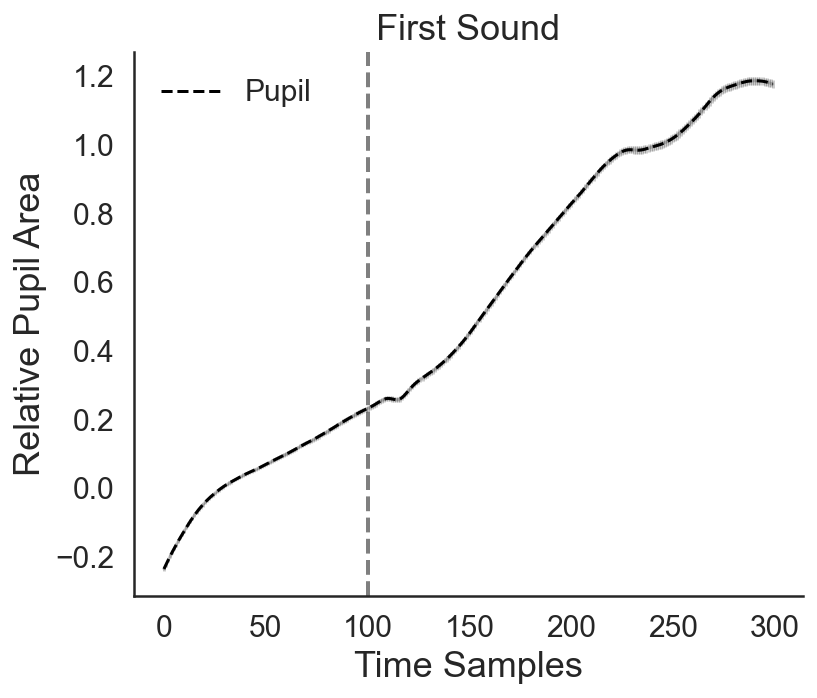

In [144]:
show_raw_pupil(pupilFirstSnd,100,baseP, title = 'First Sound')

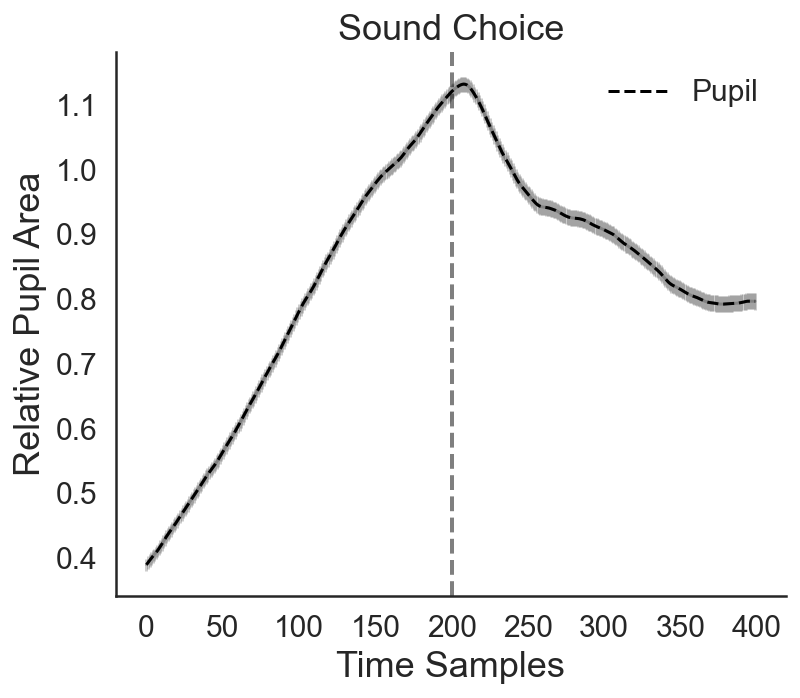

In [145]:
show_raw_pupil(pupilChoice,200,baseP, title = 'Sound Choice') # we add -10 becuase we use "feedback" event with happens 20ms after actual choice 

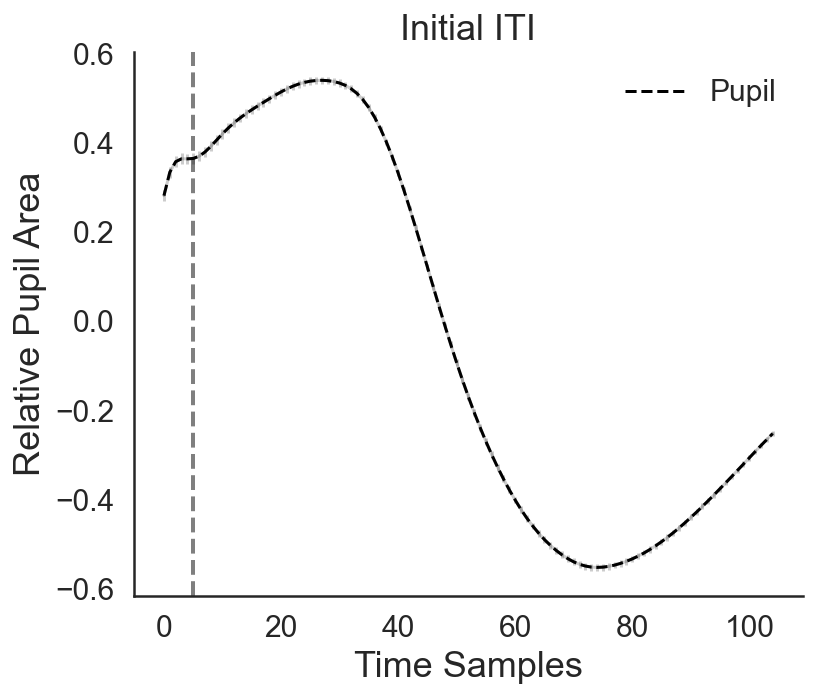

In [146]:
show_raw_pupil(pupilIti,5,baseP, title = 'Initial ITI')

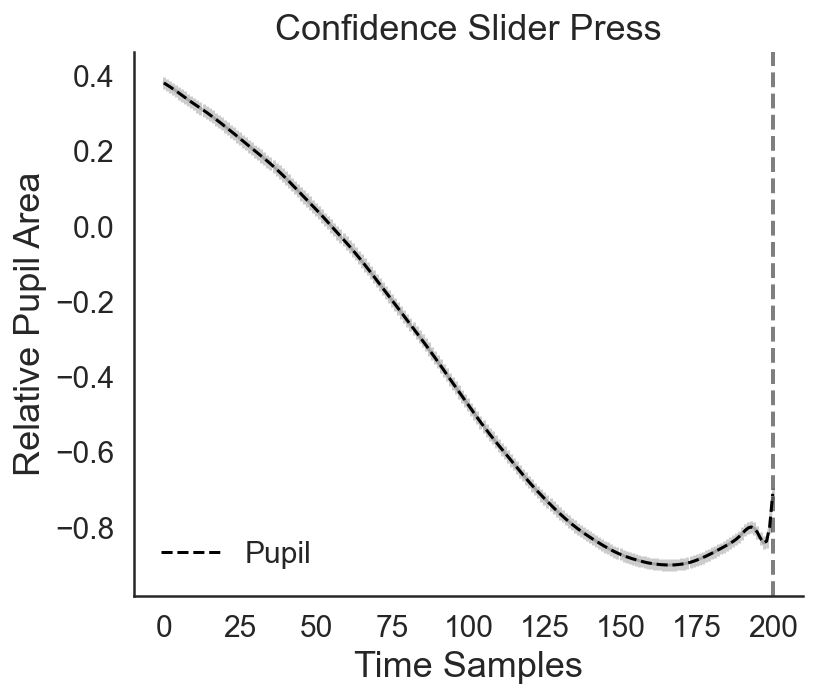

In [147]:
show_raw_pupil(pupilSlider,200,baseP, title= 'Confidence Slider Press') 

----------------------------------

# Select participants to extract the bahavioural

In [148]:
pupilInfo.RECORDING_SESSION_LABEL.unique()

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot15',
       'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20', 'Pilot21', 'Pilot22',
       'Pilot23', 'Pilot24', 'Pilot25', 'Pilot27', 'Pilot29', 'Pilot30',
       'Pilot31', 'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37',
       'Pilot38', 'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5',
       'Pilot8', 'Pilot9'], dtype=object)

In [149]:
numPartRecover = []
for i1 in pupilInfo.RECORDING_SESSION_LABEL.unique():
    i1 = i1.replace('Pilot','')
    i1 = i1.replace('pilot','')
    i1 = i1.replace('P','')
    i1 = i1.replace('x2','')
    numPartRecover.append(int(i1))
    

In [150]:
numPartRecover

[33,
 10,
 11,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 5,
 8,
 9]

# 4.  Include Behavioural data

# Load choice info

In [151]:
# Select participants accepted from Behavioural analysis

choiceNameFrames = list()

for i in np.arange(len(numPartRecover)):
    choiceNameFrames1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot'+str(numPartRecover[i])+'/RESULTS_FILE.txt')
    
    choiceNameFrames1.sort()
    
    choiceNameFrames.extend(choiceNameFrames1)


In [152]:
choiceNameFrames

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot33/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot10/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot11/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot12/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot13/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot15/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot17/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot18/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot19/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot20/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot21/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot22/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupil

## Join dataframes 

In [153]:
partic_num=len(choiceNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameAll = pd.DataFrame( )

for j in range (partic_num):
    choiceFrames = pd.read_csv(choiceNameFrames[j],delim_whitespace=True) 

    # add participant name column
    partNamesChoice = [int(j)]*len(choiceFrames)
    #sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    choiceFrames['part'] = partNamesChoice 
    
    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)


In [154]:
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,whichfirstopt_1,noiseinl_1,noiseinr_1,freql_1,freqr_1,frame_1,itm_1,itm,key_pract,part
0,P33x2,21,Experiment,155,1,0,1,1,8,2,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L08_R02.wav,m,0
1,P33x2,22,Experiment,150,1,0,1,1,7,6,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L07_R06.wav,m,0
2,P33x2,23,Experiment,151,1,0,1,1,7,8,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L07_R08.wav,m,0
3,P33x2,24,Experiment,96,1,0,1,1,1,7,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L01_R07.wav,m,0
4,P33x2,25,Experiment,180,1,0,1,1,10,9,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L10_R09.wav,m,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Pilot9,196,Experiment,25,1,0,1,1,3,8,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L03_R08.wav,m,31
5754,Pilot9,197,Experiment,5,1,0,1,1,1,6,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L01_R06.wav,m,31
5755,Pilot9,198,Experiment,73,1,0,1,1,9,1,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L09_R01.wav,m,31
5756,Pilot9,199,Experiment,67,1,0,1,1,8,4,...,0,1,1,7,4,2,SimClick_Noise_1_L07_R04.wav,SimClick_Noise_1_L08_R04.wav,m,31


## add index to keep as column to behavioural dataframe

In [155]:
#indexBehavRemove = []
#for i in range(len(choiceFrameAll)):
#    indexBehavRemove.append(indexDF.loc[(indexDF['part'] == choiceFrameAll.iloc[i].Session_Name_)  &  (indexDF['trial'] == choiceFrameAll.iloc[i].Trial_Index_)].trial2Keep.values[0])
#choiceFrameAll['trial2Keep'] = indexBehavRemove

In [156]:
#indexDF = indexDF.loc[indexDF['trial2Keep'] == True].copy()
#indexDF = indexDF.reset_index()
#
#indexDF

In [157]:
#choiceFrameAll = choiceFrameAll.loc[choiceFrameAll['trial2Keep'] == True].copy()
#choiceFrameAll = choiceFrameAll.reset_index()
#
#choiceFrameAll

## Normalize (z-score) values

In [158]:
choiceFrameAll["zRT"] = z_score1(choiceFrameAll,'part',"Choice_SND1_RT")
choiceFrameAll["zConf"] = z_score1(choiceFrameAll,'part',"CONF")

choiceFrameAll["zLFreq"] = z_score1(choiceFrameAll,'part',"freql")
choiceFrameAll["zRFreq"] = z_score1(choiceFrameAll,'part',"freqr")

choiceFrameAll["Choice"] = (choiceFrameAll['Choice_SND1'] == 'm')*1 + (choiceFrameAll['Choice_SND1'] == 'z')*0

## Include new variables

In [159]:
choiceFrameAll["totFreq"] = choiceFrameAll['freql'] + choiceFrameAll['freqr'] 
choiceFrameAll["dFreq"] =  - choiceFrameAll['freql'] +  choiceFrameAll['freqr'] 
choiceFrameAll["absDFreq"] =  np.abs(- choiceFrameAll['freql'] +  choiceFrameAll['freqr'] )

choiceFrameAll["zTotFreq"] = z_score1(choiceFrameAll,'part',"totFreq")
choiceFrameAll["zDFreq"] = z_score1(choiceFrameAll,'part',"dFreq")
choiceFrameAll["zAbsDFreq"] = z_score1(choiceFrameAll,'part',"absDFreq")


choiceFrameAll["choFreq"] =  ((choiceFrameAll["Choice"] == 0) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 1) *choiceFrameAll['freqr'] )
choiceFrameAll["unchoFreq"] =  ((choiceFrameAll["Choice"] == 1) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 0) *choiceFrameAll['freqr'] )

choiceFrameAll["zChoFreq"] = z_score1(choiceFrameAll,'part',"choFreq")
choiceFrameAll["zUnchoFreq"] = z_score1(choiceFrameAll,'part',"unchoFreq")

## split data : by confidence

In [160]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['ConfSplit'],Splits_variables = ['zConf'])
choiceFrameAll['ConfSplit'] = data_splits['ConfSplit'].values

## split data : by Totfreq and DFreq

In [161]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['TotFreqSplit'],Splits_variables = ['zTotFreq'])
choiceFrameAll['TotFreqSplit'] = data_splits['TotFreqSplit'].values

data_splits = splitBy(choiceFrameAll, Splits_headers = ['DFreqSplit'],Splits_variables = ['zAbsDFreq'])
choiceFrameAll['DFreqSplit'] = data_splits['DFreqSplit'].values

data_splits = splitBy(choiceFrameAll, Splits_headers = ['ChoFreqSplit'],Splits_variables = ['zChoFreq'])
choiceFrameAll['ChoFreqSplit'] = data_splits['ChoFreqSplit'].values


In [162]:
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,zDFreq,zAbsDFreq,choFreq,unchoFreq,zChoFreq,zUnchoFreq,ConfSplit,TotFreqSplit,DFreqSplit,ChoFreqSplit
0,P33x2,21,Experiment,155,1,0,1,1,8,2,...,-1.401298,1.055290,8,2,0.941502,-1.263450,0.0,0.0,1.0,1.0
1,P33x2,22,Experiment,150,1,0,1,1,7,6,...,-0.233550,-1.206045,6,7,0.235376,0.459436,0.0,1.0,0.0,1.0
2,P33x2,23,Experiment,151,1,0,1,1,7,8,...,0.233550,-1.206045,7,8,0.588439,0.804014,0.0,1.0,0.0,1.0
3,P33x2,24,Experiment,96,1,0,1,1,1,7,...,1.401298,1.055290,1,7,-1.529941,0.459436,1.0,0.0,1.0,0.0
4,P33x2,25,Experiment,180,1,0,1,1,10,9,...,-0.233550,-1.206045,10,9,1.647629,1.148591,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Pilot9,196,Experiment,25,1,0,1,1,3,8,...,1.167748,0.603023,8,3,0.912374,-0.911144,0.0,1.0,1.0,1.0
5754,Pilot9,197,Experiment,5,1,0,1,1,1,6,...,1.167748,0.603023,1,6,-1.528372,0.133480,1.0,0.0,1.0,0.0
5755,Pilot9,198,Experiment,73,1,0,1,1,9,1,...,-1.868397,1.959824,9,1,1.261053,-1.607561,0.0,0.0,1.0,1.0
5756,Pilot9,199,Experiment,67,1,0,1,1,8,4,...,-0.934199,0.150756,8,4,0.912374,-0.562936,0.0,1.0,1.0,1.0


In [163]:
#data_expHigh = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] # 1 = high, 2 = low
#data_expLow = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] # 1 = high, 2 = low

# Pick for confidence levels across both frames
data_expHigh = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 1)] 
data_expLow = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 0)] 

 # extract relevant participants for pupil info

In [164]:
kept_part = choiceFrameAll.Session_Name_.unique()

In [165]:
pupiInfoBehav = []
for j in kept_part:
    indexDFPart = indexDF.loc[(indexDF['part'] ==  j)].copy()
    pupiInfoBehav.extend(indexDFPart.values.tolist())
    
pupiIdxBehav = pd.DataFrame(pupiInfoBehav, columns=indexDF.columns)

In [166]:
pupiIdxBehav

,part,trial,firstSndIdx,choiceIdx,itiIdx,confAcceptIdx,confBeginIdx,trial2Keep,basePupil
0,P33x2,21,207,549,7,1037,850,True,-0.084775
1,P33x2,22,1249,1515,1048,1955,1817,True,-0.620707
2,P33x2,23,2166,2312,1966,2706,2614,True,-0.653652
3,P33x2,24,2917,3052,2717,3588,3353,True,-0.405405
4,P33x2,25,3798,3973,3598,4566,4275,True,0.510913
...,...,...,...,...,...,...,...,...,...
5753,Pilot9,196,5484773,5484991,5484572,5485448,5485292,True,-0.739904
5754,Pilot9,197,5485659,5485988,5485458,5486432,5486290,True,-0.190301
5755,Pilot9,198,5486644,5486872,5486444,5487325,5487174,True,0.539630
5756,Pilot9,199,5487537,5487742,5487337,5488201,5488044,True,-0.626258


In [167]:
np.unique(pupiIdxBehav.part)

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot15',
       'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20', 'Pilot21', 'Pilot22',
       'Pilot23', 'Pilot24', 'Pilot25', 'Pilot27', 'Pilot29', 'Pilot30',
       'Pilot31', 'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37',
       'Pilot38', 'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5',
       'Pilot8', 'Pilot9'], dtype=object)

In [168]:
pupilBaseline = []
for i in pupiIdxBehav['firstSndIdx'].values.astype(int):
    pupilBaseline.append(pupilInfo.iloc[i-200:i-1].zPupil.values) # extract 2 seconds prior to the appearance of the sound

    
basePBehav = [None]*len(pupilBaseline)
for j in range(len(pupilBaseline)):
    pupilSeq1S = [None]*len(pupilBaseline[j])
    for jj in range(len(pupilBaseline[j])):
        if pupilBaseline[j][jj]=='':
            pupilSeq1S[jj]=np.nan
        else:
            pupilSeq1S[jj] = float(pupilBaseline[j][jj])
    basePBehav[j] = np.nanmean(pupilSeq1S) # baseP contains the value of pupil for the baseline of each trial
pupiIdxBehav['basePupil'] = basePBehav

remember that the sampling time was 100hz, so we have 10ms between samples

In [169]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in pupiIdxBehav['firstSndIdx'].values.astype(int):
    pupilFirstSnd.append(pupilInfo.iloc[i-100:i+100].zPupil.values)
    
for i in pupiIdxBehav['choiceIdx'].values.astype(int):
    pupilChoice.append(pupilInfo.iloc[i-200:i+200].zPupil.values)
    
for i in pupiIdxBehav['itiIdx'].values.astype(int):
    pupilIti.append(pupilInfo.iloc[i-10:i+100].zPupil.values)    

for i in pupiIdxBehav['confAcceptIdx'].values.astype(int):
    pupilSlider.append(pupilInfo.iloc[i-200:i+1].zPupil.values)    # if increase more than 10 you can start reading outside the list 
    

## extract additionally (data for regression samples analysis, individual participant fit following Urai et al., 2017 example)

In [170]:
pupilChoice_X = []
pupilChoice_Y = []

for i in pupiIdxBehav['choiceIdx'].values.astype(int):
    pupilChoice_X.append(pupilInfo.iloc[i-200:i+200].zX.values)
    pupilChoice_Y.append(pupilInfo.iloc[i-200:i+200].zY.values)

In [171]:
def show_raw_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "",labFrame = ['High','Low']
):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    data_expHigh = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 0)] #
    
#    index_high = data_expHigh.TRIAL_N_LIVE.values-1
#    index_low = data_expLow.TRIAL_N_LIVE.values-1

    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values

    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    #baseTimeStd1 =np.nanstd(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')

    figsize(6, 5)
    
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    #baseTimeStd2 =np.nanstd(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')

    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#5BC8AF','#F9CB40','#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    plt.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-')
    #plot low    
    plt.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[1],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean2,color=colorP[1],label = labFrame[1],ls = '-')
    
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples [ms]",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    # since we have 500 hz samples (i.e. the distance between each sample is 2ms) we multiple by 2 the interval
    #plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
    #    int(-event_time*2),int(-event_time/2*2) ,0, int(event_time/2*2),int((len(xSecs)-event_time)*2) ],fontsize= 15)

    sample_factor = 10

    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)

    
    
    plt.yticks(fontsize= 15)
    
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

In [172]:
len(pupilFirstSnd)

5758

In [173]:
len(basePBehav)

5758

In [174]:
len(choiceFrameAll)

5758

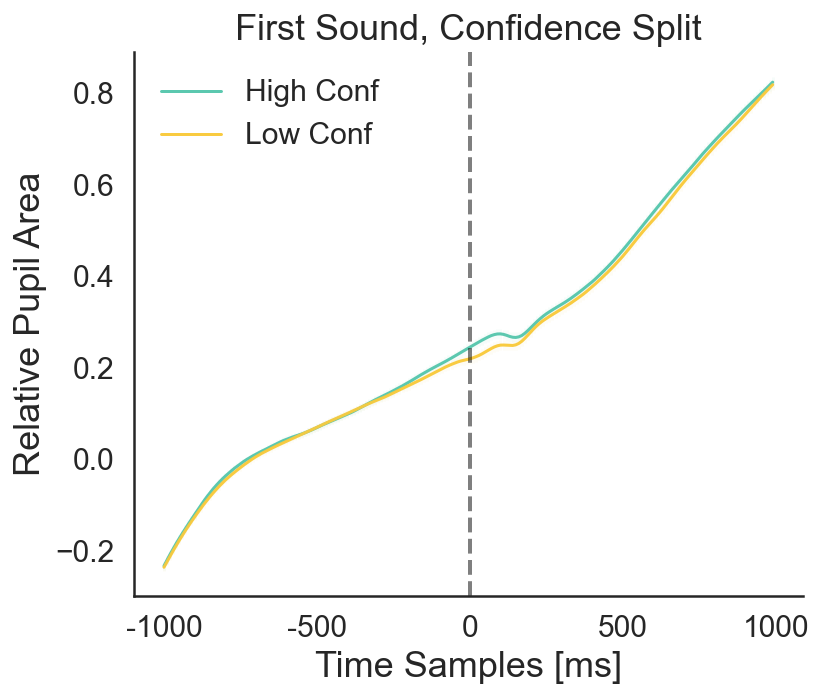

In [175]:
show_raw_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'First Sound, Confidence Split',labFrame = ['High Conf','Low Conf'])

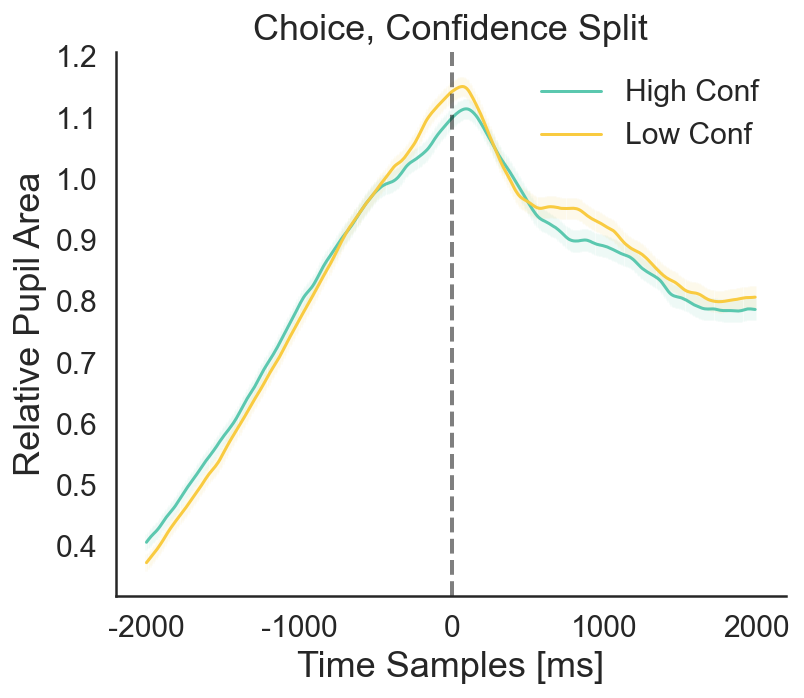

In [176]:
show_raw_pupil_split(pupilChoice,200,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'Choice, Confidence Split',labFrame = ['High Conf','Low Conf'])

# Checking relative change in pupil size separating by frame

# Separate by frame

In [177]:

def show_frame_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "", labFrame = ['High','Low']):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    
    # initialize figure
    
    figsize(12, 5)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    #############################################
    ### Pick for the data for the FIRST FRAME ###
    #############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
    
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    
    # with this we pick always the index only for the first part
    #index_high = data_expHigh.TRIAL_N_LIVE.values-1
    #index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values

    
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax1.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.5 );
    ax1.plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-',linewidth=3.5)
    #plot low    
    ax1.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[2],marker='', alpha = 0.5 );
    ax1.plot(xSecs,baseTimeMean2,color=colorP[2],label = labFrame[1],ls = '-',linewidth=3.5)
    
    ax1.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax1.set(xlabel = "Time Samples [ms]",ylabel = "Relative Pupil Area")

    
    
    sample_factor = 10
    
    plt.sca(ax1)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    ax1.yaxis.label.set_size(15)
    ax1.xaxis.label.set_size(15)
   
    ax1.legend(frameon=False, fontsize = 15)
    ax1.set_title("High Clicks Frame", fontsize = 18)
    ##############################################
    ### Pick for the data for the SECOND FRAME ###
    ##############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    #index_high = data_expHigh.TRIAL_N_LIVE.values-1
    #index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax2.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[1],marker='', alpha = 0.5 );
    ax2.plot(xSecs,baseTimeMean1,color=colorP[1],label = labFrame[0],ls = '-',linewidth=3.5)
    ax2.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[3],marker='', alpha = 0.5 );
    ax2.plot(xSecs,baseTimeMean2,color=colorP[3],label = labFrame[1],ls = '-',linewidth=3.5)
    
    ax2.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax2.set(xlabel = "Time Samples [ms]")

    
    
    plt.sca(ax2)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    ax2.legend(frameon=False, fontsize = 15)
    ax2.set_title("Low Clicks Frame",fontsize = 18)
    ax2.xaxis.label.set_size(15)

    
    
    
    
    plt.suptitle(title,size=18)

    sns.set_style("white")
    sns.despine()


## split by TotFreq 

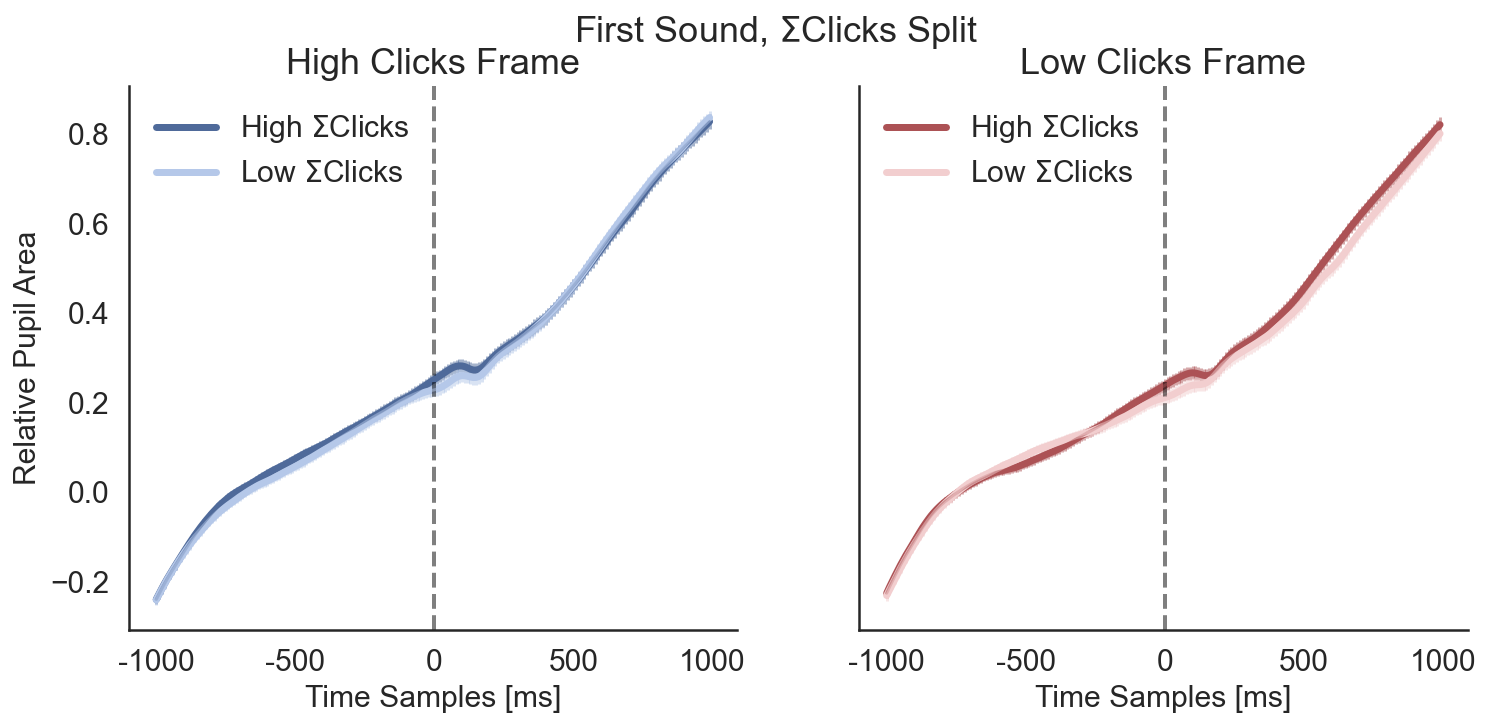

In [178]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'First Sound, $\Sigma$Clicks Split', labFrame = ['High $\Sigma$Clicks','Low $\Sigma$Clicks'])

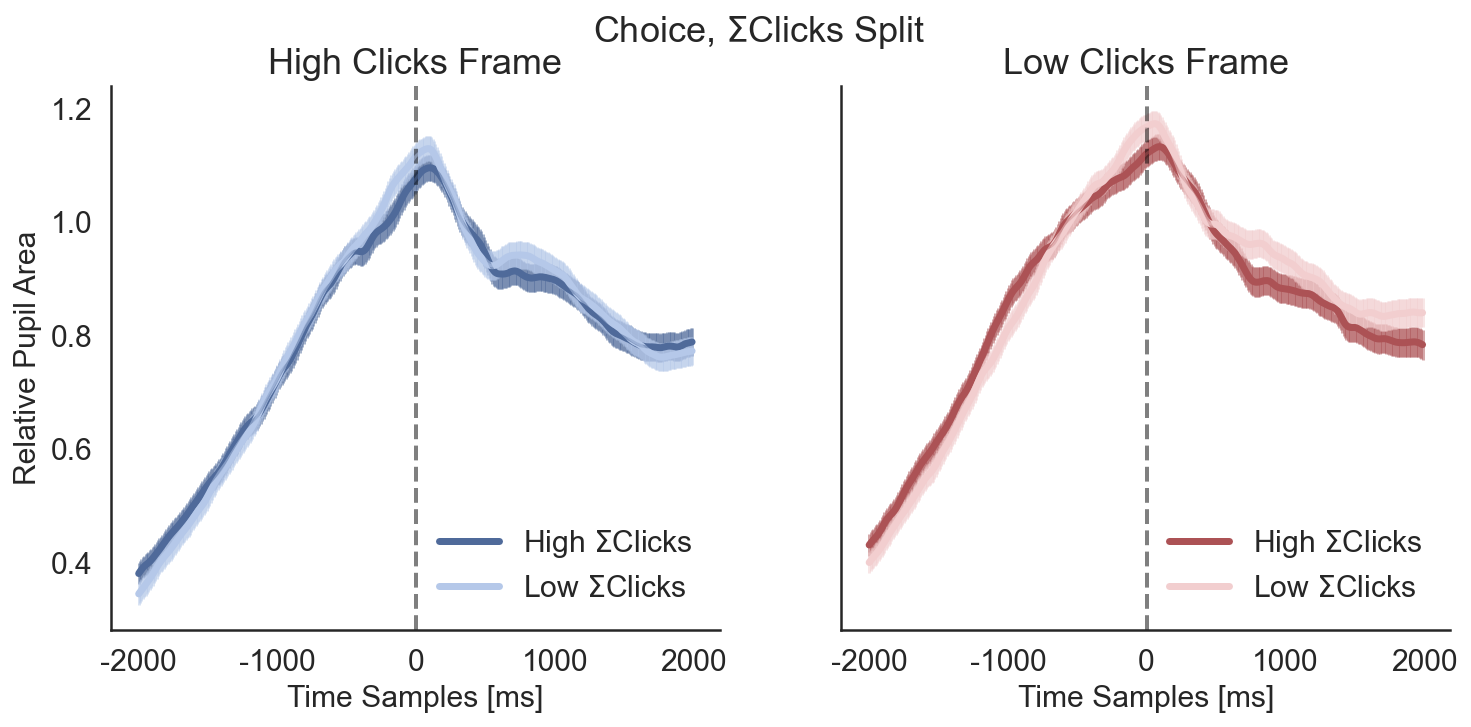

In [179]:
show_frame_pupil_split(pupilChoice,200,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'Choice, $\Sigma$Clicks Split', labFrame = ['High $\Sigma$Clicks','Low $\Sigma$Clicks'])


## split by Confidence 

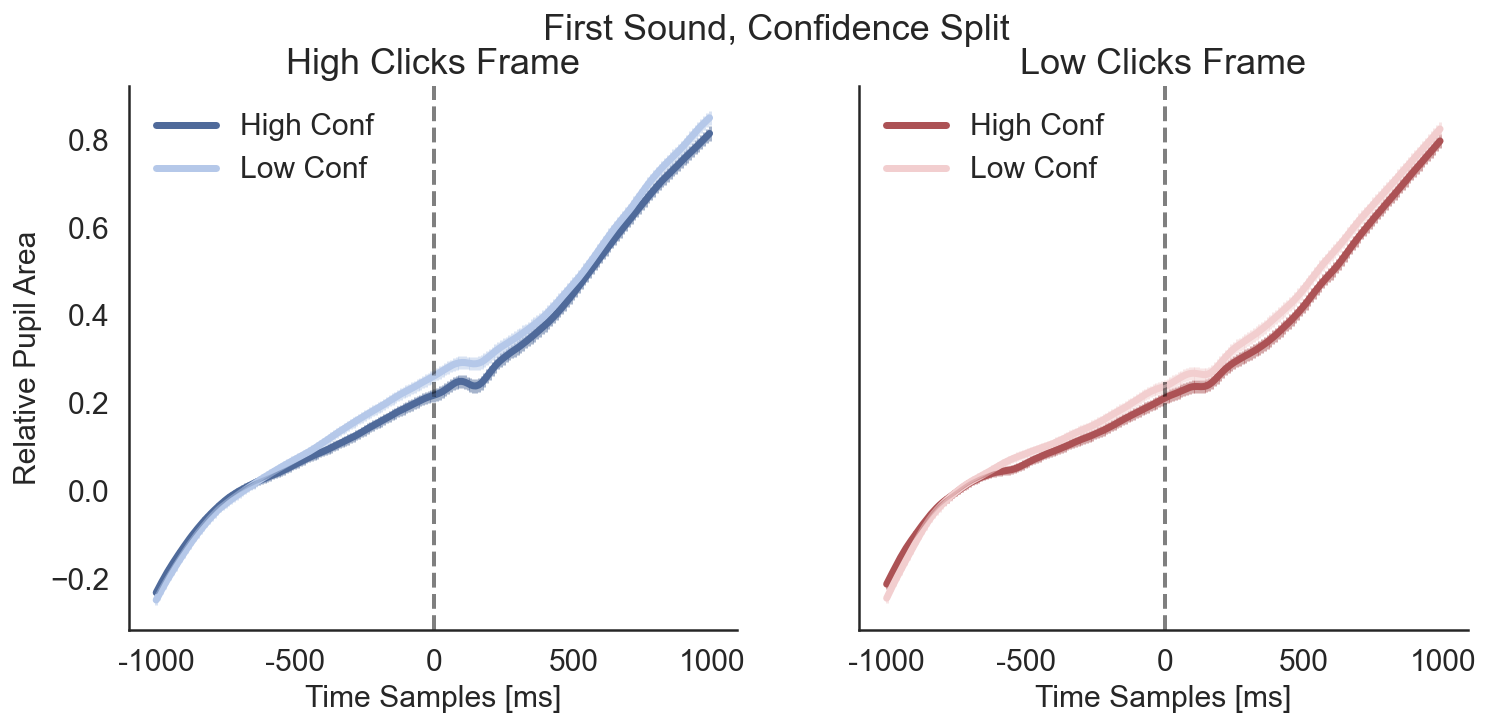

In [180]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'ConfSplit',title = 'First Sound, Confidence Split', labFrame = ['High Conf','Low Conf'])

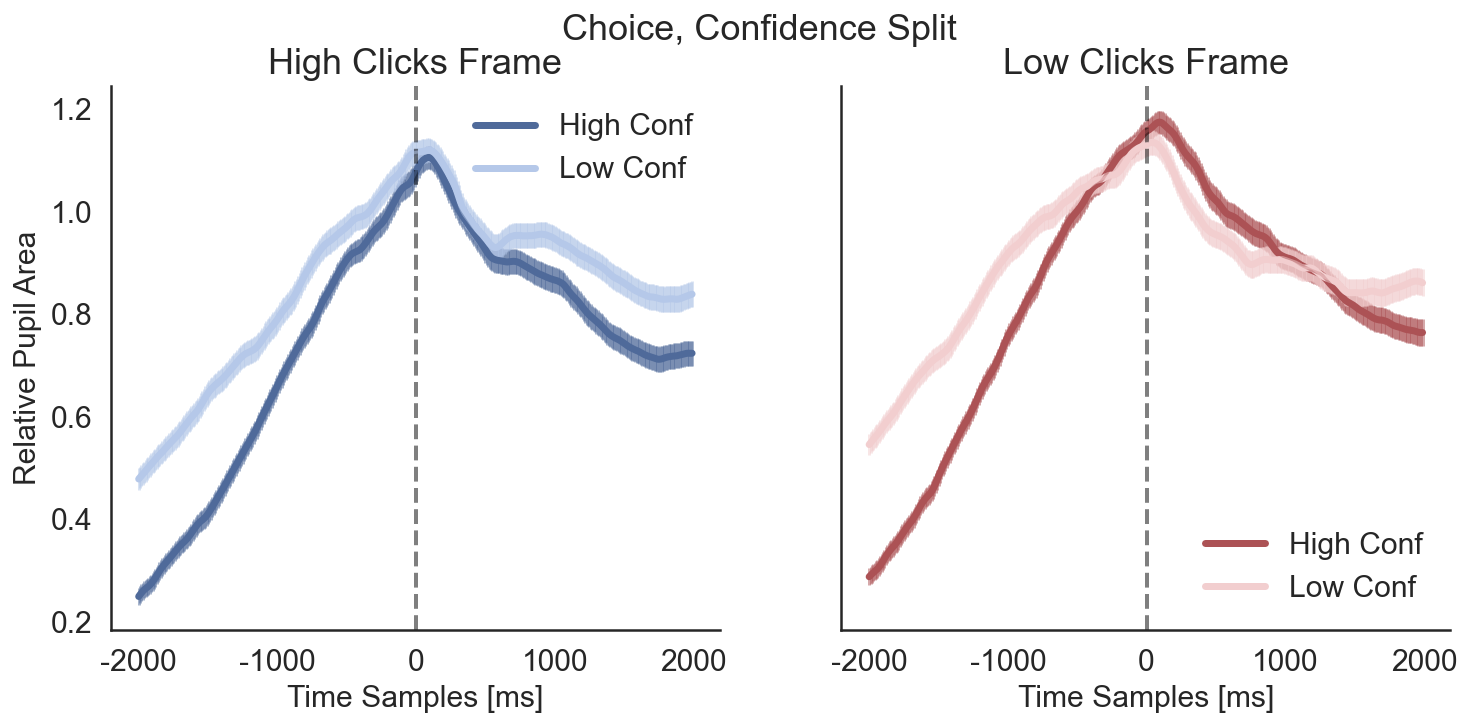

In [181]:
show_frame_pupil_split(pupilChoice,200,choiceFrameAll,basePBehav,'ConfSplit',title = 'Choice, Confidence Split', labFrame = ['High Conf','Low Conf'])


## split by DFreq 

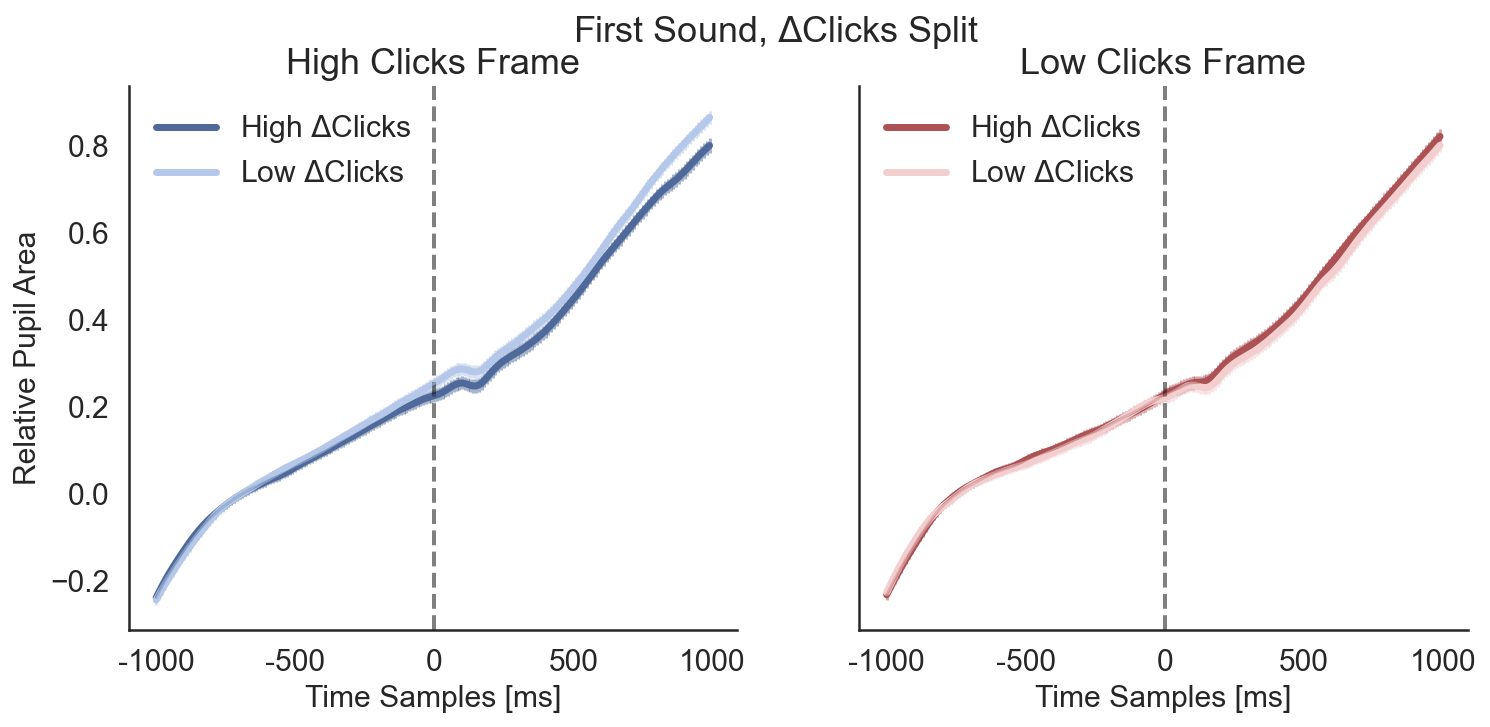

In [182]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'DFreqSplit',title = 'First Sound, $\Delta$Clicks Split', labFrame = ['High $\Delta$Clicks','Low $\Delta$Clicks'])

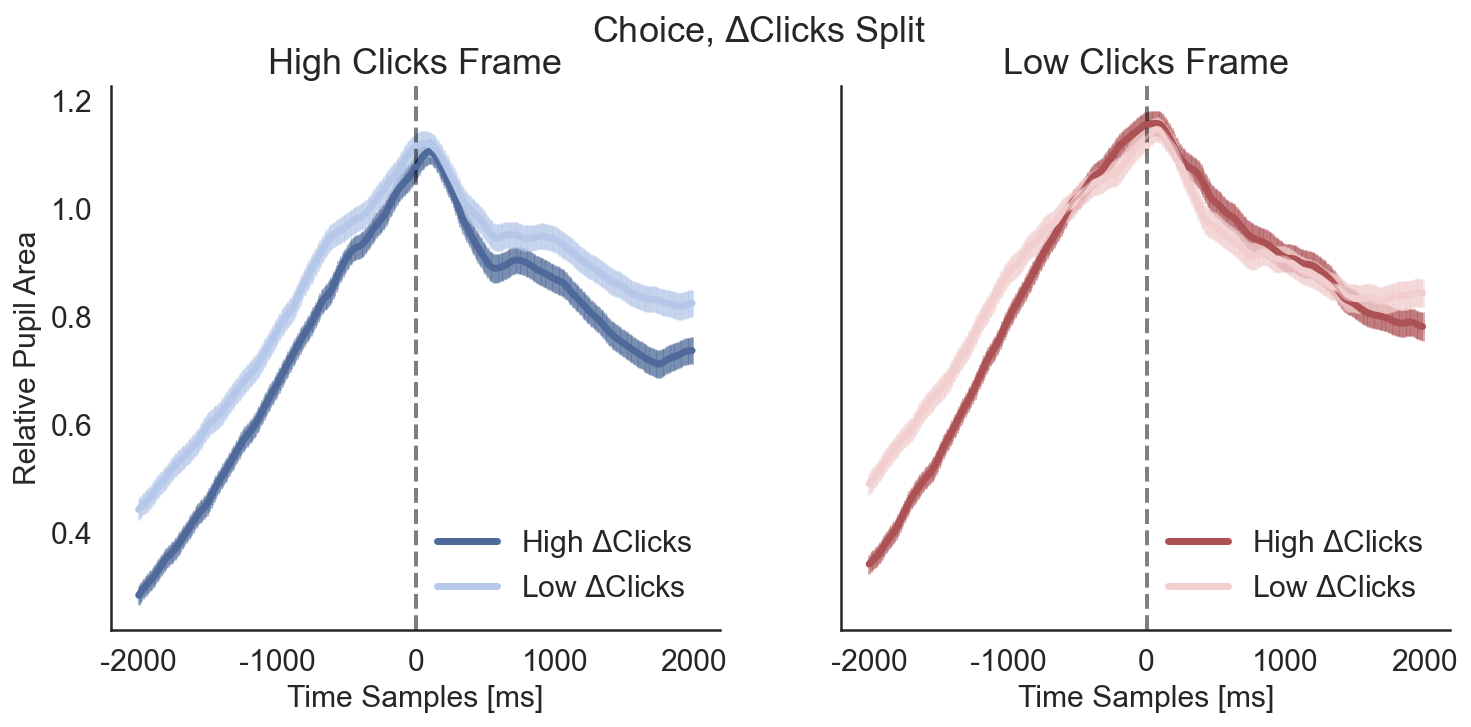

In [183]:
show_frame_pupil_split(pupilChoice,200,choiceFrameAll,basePBehav,'DFreqSplit',title = 'Choice, $\Delta$Clicks Split', labFrame = ['High $\Delta$Clicks','Low $\Delta$Clicks'])


# split by Chosen Clicks


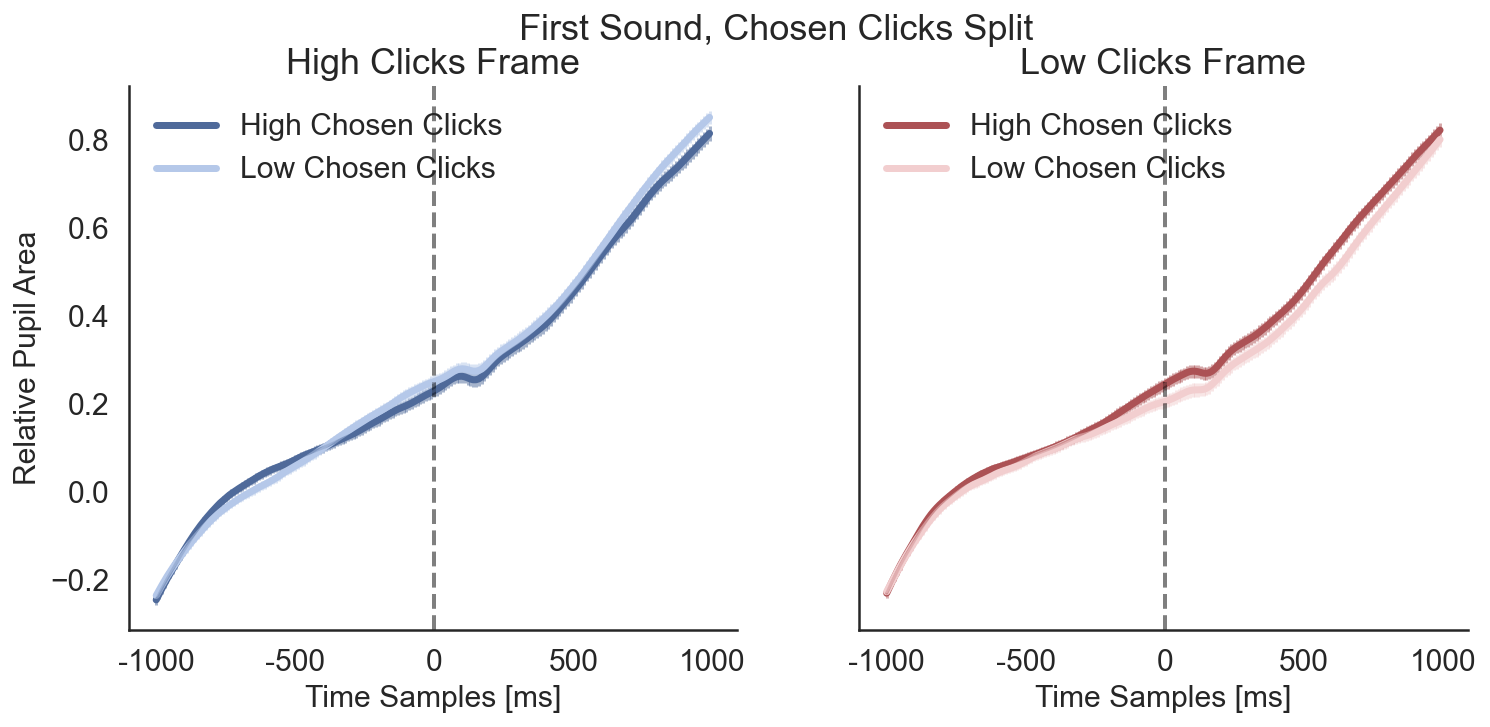

In [184]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'ChoFreqSplit',title = 'First Sound, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])

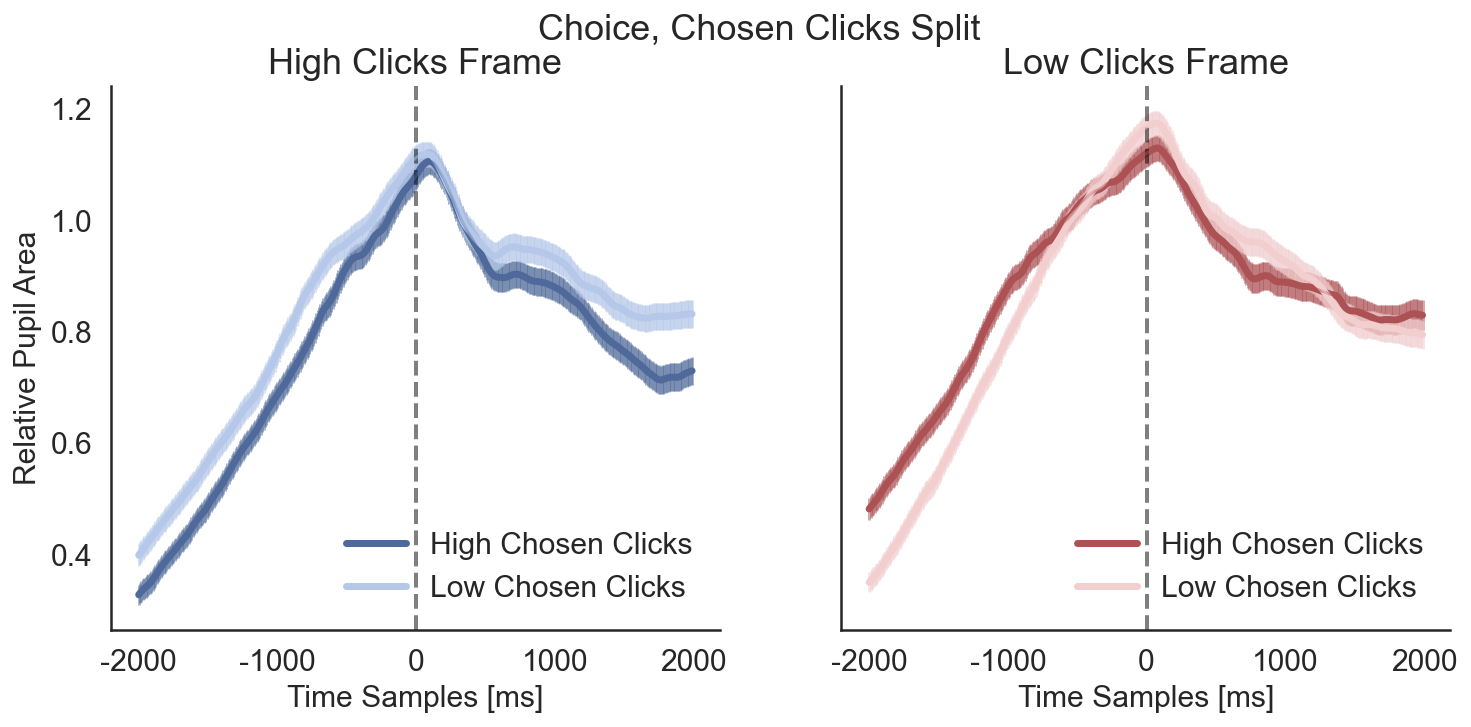

In [185]:
show_frame_pupil_split(pupilChoice,200,choiceFrameAll,basePBehav,'ChoFreqSplit',title = 'Choice, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])


# Separate correct from incorrect trials

In [186]:
Correct = []
for i in range(len(choiceFrameAll)):
    if choiceFrameAll.frame[i] == 1:
        if (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
            
        else:
            Correct.append(0)
    if choiceFrameAll.frame[i] == 2:
        if (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
        else:
            Correct.append(0)

choiceFrameAll["correct"] = Correct

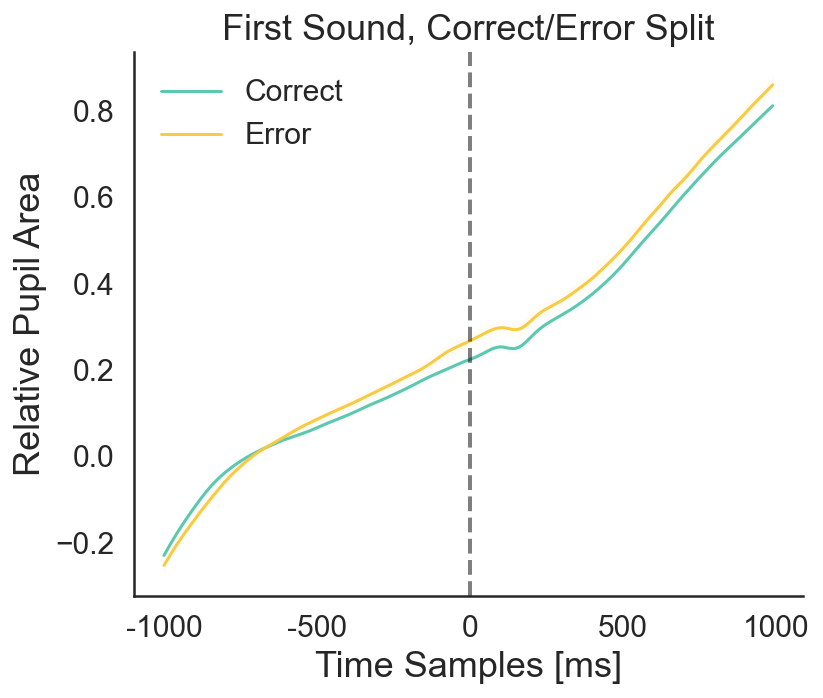

In [187]:
show_raw_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'correct',title = 'First Sound, Correct/Error Split',labFrame = ['Correct','Error'])

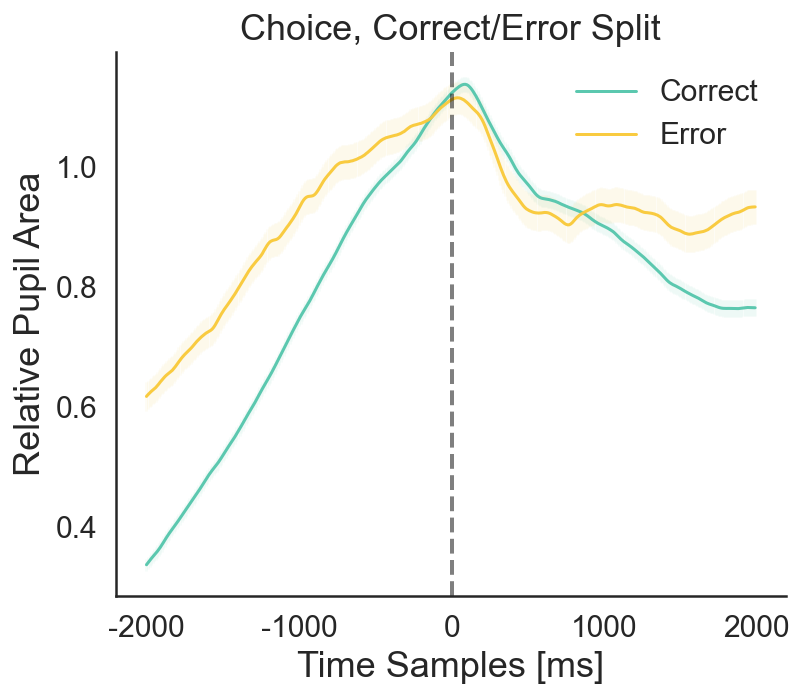

In [188]:
show_raw_pupil_split(pupilChoice,200,choiceFrameAll,basePBehav,'correct',title = 'Choice, Correct/Error Split',labFrame = ['Correct','Error'])

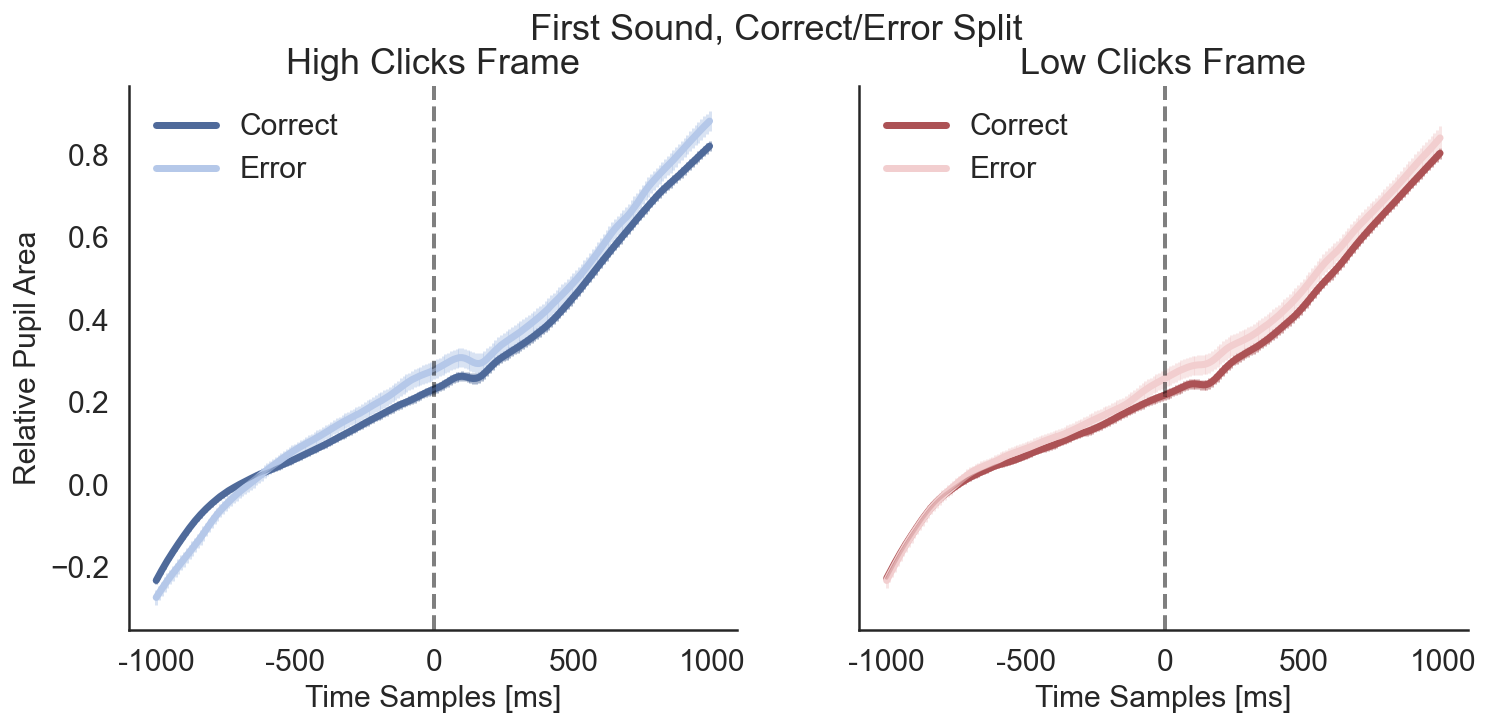

In [ ]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'correct',title = 'First Sound, Correct/Error Split', labFrame = ['Correct','Error'])

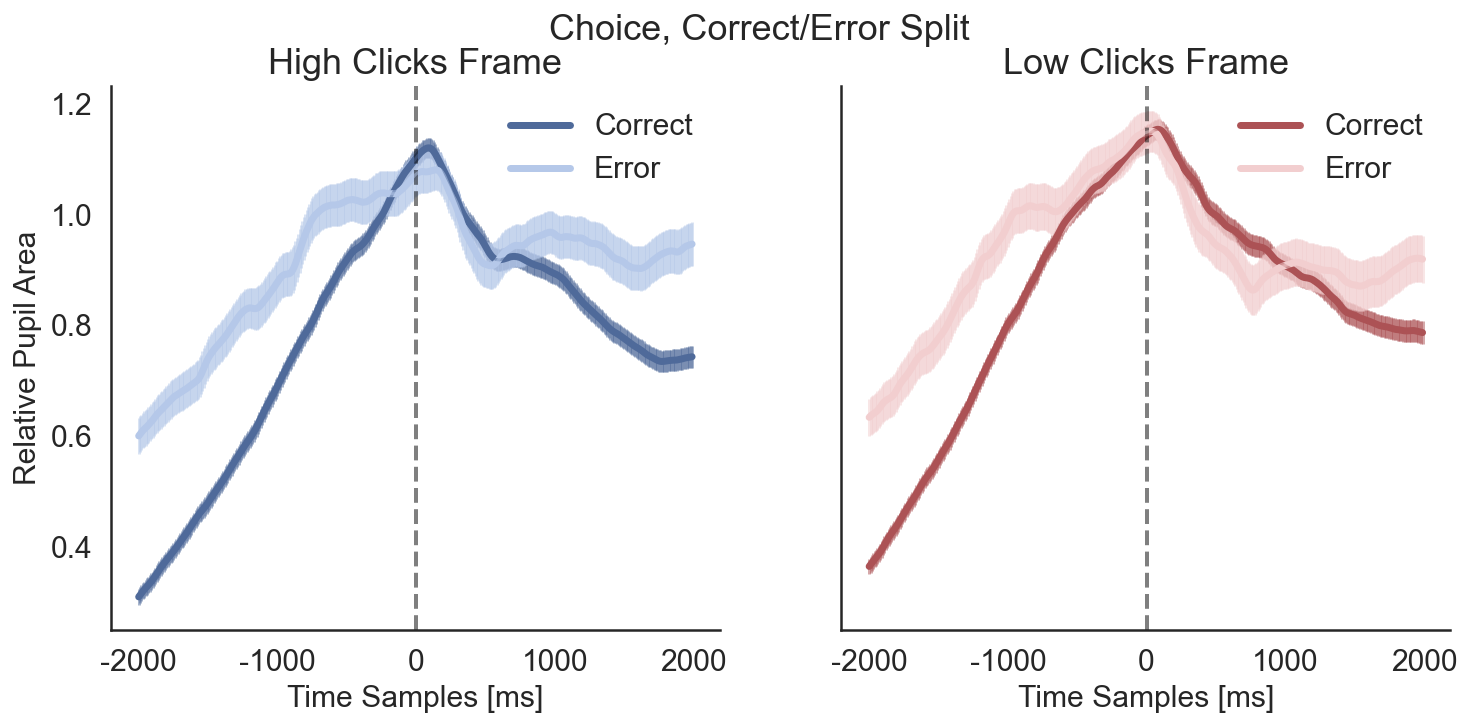

In [ ]:
show_frame_pupil_split(pupilChoice,200,choiceFrameAll,basePBehav,'correct',title = 'Choice, Correct/Error Split', labFrame = ['Correct','Error'])

# Separate by frame (and use permutation test)

In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [ ]:
def shuffle(df, n=1, axis=0):     
         df = df.copy()
         for _ in range(n):
            df.apply(np.random.shuffle, axis=axis)
         return df

In [ ]:
def shuffleDF (df1,df2):

    df1_shuff = pd.DataFrame(columns = df1.columns)
    df2_shuff = pd.DataFrame(columns = df2.columns)
    
    for ii in range(len(df1)):
        if rand(1)>0.5:
            df1_shuff.loc[df2.index[ii]] = df2.iloc[ii]
            df2_shuff.loc[df1.index[ii]] = df1.iloc[ii]
        else:
            df2_shuff.loc[df1.index[ii]] = df1.iloc[ii]
            df1_shuff.loc[df2.index[ii]] = df2.iloc[ii]
    
    return(df1_shuff,df2_shuff)


In [ ]:
def shuffleDFone (df1,df2):#

    #df1_shuff = pd.DataFrame(columns = df1.columns)
    #df2_shuff = pd.DataFrame(columns = df2.columns)
    
    df1_shuff = shuffle(df1)
    df2_shuff = shuffle(df1)
    
    return(df1_shuff,df2_shuff)


In [ ]:
import statsmodels.formula.api as sm
import statsmodels


In [ ]:
def show_frame_pupil_split_regress(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "", labFrame = ['High','Low'],nperm = 100):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    
    # initialize figure
    
    figsize(12, 5)
    
    #fig, (ax1, ax2) = plt.subplots(1, 1, sharey=True)
    
    
    choiceFrameAllH = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
    choiceFrameAllL = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 

    index_high = choiceFrameAllH.index.values
    index_low = choiceFrameAllL.index.values

    
     # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    
    
    #baseTimeMean1 =np.nanmean(base1, axis= 0)
    #baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    
    #baseTimeMean2 =np.nanmean(base2, axis= 0)
    #baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    
    
    
    # run regression analysis for each sample
    
    
    regFormula = "pupil ~ choEv + unchoEv"
    betasH = []
    betasL = []
    
    betasErrorH_lower = []
    betasErrorH_upper = []
    
    betasErrorL_lower = []
    betasErrorL_upper = []
    
    betasErrorH_ = []
    betasErrorL_ = []
    
#    pVal_perm = [99]*len(base1[0])
#    pValH_perm = [99]*len(base1[0])
#    pValL_perm = [99]*len(base1[0])
    pVal_perm = []
    pValH_perm = []
    pValL_perm = []

    
    # frame 1
    dfH = pd.DataFrame()
    dfH['choEv'] =  choiceFrameAllH.zChoFreq.values
    dfH['unchoEv'] =  choiceFrameAllH.zUnchoFreq.values
    dfH['part']  = choiceFrameAllH.part.values
    # frame 2
    dfL = pd.DataFrame()
    dfL['choEv'] =  choiceFrameAllL.zChoFreq.values
    dfL['unchoEv'] =  choiceFrameAllL.zUnchoFreq.values
    dfL['part']  = choiceFrameAllL.part.values    
    
    
    for s in range(int(np.round(len(base1[0])))): # extract for each number of sample
        
        # to subsample 
        if s%8:
            continue
        
        print(s)
        # frame 1
        dfH['pupil'] = column(base1,s)
      
        olsRegH = sm.ols(formula = regFormula, data=dfH).fit()
        betasH.append(olsRegH.params.values[1])
        betasErrorH_lower.append(olsRegH.conf_int(alpha=0.05, cols=None)[0].values[1])
        betasErrorH_upper.append(olsRegH.conf_int(alpha=0.05, cols=None)[1].values[1])
        betasErrorH_.append(olsRegH.conf_int(alpha=0.05, cols=None)[1].values[1] - olsRegH.conf_int(alpha=0.05, cols=None)[0].values[1])
        
        # frame 2
        dfL['pupil'] = column(base2,s)
      
        olsRegL = sm.ols(formula = regFormula, data=dfL).fit()
        betasL.append(olsRegL.params.values[1])
        betasErrorL_lower.append(olsRegL.conf_int(alpha=0.05, cols=None)[0].values[1])
        betasErrorL_upper.append(olsRegL.conf_int(alpha=0.05, cols=None)[1].values[1])
        betasErrorL_.append(olsRegL.conf_int(alpha=0.05, cols=None)[1].values[1] - olsRegL.conf_int(alpha=0.05, cols=None)[0].values[1])
        
        
        # difference between betas to estimate the threshold for permutation comparison.
        deltaBeta = olsRegH.params.values[1] - olsRegL.params.values[1]
        
        # run permutations for this sample
        
        
        betasH_perm = []
        betasL_perm = []
        deltaBetas_perm = []
        for p in range(0,nperm):
            
            
            # shuffle the trials between groups (frames)
            df1_shuff, df2_shuff = shuffleDFone(dfH,dfL)
            
            # calculate regression for permutation dataframe1
            olsReg1_perm = sm.ols(formula = regFormula, data=df1_shuff).fit()
            #betas1_perm.append(olsReg1_perm.params.values[1])
            
            # calculate regression for permutation dataframe2
            olsReg2_perm = sm.ols(formula = regFormula, data=df2_shuff).fit()
            #betas2_perm.append(olsReg2_perm.params.values[1])
             
            betasH_perm.append(olsReg1_perm.params.values[1])
            betasL_perm.append(olsReg2_perm.params.values[1])
    
            deltaBetas_perm.append(olsReg1_perm.params.values[1] - olsReg2_perm.params.values[1])

        
        pVal_perm.append(len(np.where(np.abs(deltaBetas_perm) >= np.abs(deltaBeta))[0])/len(deltaBetas_perm)) # p_value of the permutation test
        pValH_perm.append(len(np.where(np.abs(betasH_perm) >= 0)[0])/len(betasH_perm)) # p_value of the permutation test
        pValL_perm.append(len(np.where(np.abs(betasH_perm) >= 0)[0])/len(betasH_perm)) # p_value of the permutation test
        #pVal_perm[s] = len(np.where(np.abs(deltaBetas_perm) >= np.abs(deltaBeta))[0])/len(deltaBetas_perm) # p_value of the permutation test
        #pValH_perm[s] = len(np.where(np.abs(betasH_perm) >= 0)[0])/len(betasH_perm) # p_value of the permutation test
        #pValL_perm[s] = len(np.where(np.abs(betasH_perm) >= 0)[0])/len(betasH_perm) # p_value of the permutation test
  
    
    
    # plot betas from the regression

    
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(betasH)))
    
    #plot High
    plt.errorbar(xSecs,betasH, yerr= betasErrorH_, color=colorP[2],marker='', alpha = 0.5 );
    plt.plot(xSecs,betasH,color=colorP[0],label = labFrame[0],ls = '-',linewidth=3.5)
    #plot Low frame
    xSecs = np.array(range(0,len(betasL)))

    plt.errorbar(xSecs,betasL, yerr= betasErrorL_, color=colorP[3],marker='', alpha = 0.5 );
    plt.plot(xSecs,betasL,color=colorP[1],label = labFrame[1],ls = '-',linewidth=3.5)
    
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')
    plt.axhline(0, color='black', lw=1, alpha =1 ,ls = '-')

    plt.xlabel("Time Samples [ms]", fontsize = 15)
    plt.ylabel("Beta weights [a.u.]", fontsize = 15)
    
    
    sample_factor = 10
    
    event_time = np.round(len(pVal_perm)/2)

    
    #plt.sca(ax1)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    #ax1.yaxis.label.set_size(15)
    #ax1.xaxis.label.set_size(15)
   
    plt.legend(frameon=False, fontsize = 15)
    plt.title("Pupil Size Regression", fontsize = 18)
    
    
    # plot permutation p-values for the difference between groups
    clusterSize = 6

    
    # FDR correction 0.01 (instead of bonferroni)
    _,pVal_perm_FDR,_,_ = statsmodels.stats.multitest.multipletests(pVal_perm, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)

    
    
    for ii in range(len(pVal_perm_FDR)):
    # count the number of significant value in the cluster, if over 6 then the cluster is significant 
        if ii >clusterSize:
            if np.sum(np.array(pVal_perm_FDR[ii-clusterSize:ii])<0.01) == clusterSize:
                plt.plot(xSecs[ii-clusterSize:ii], [np.max(betasL)+ np.max(betasErrorL_)+0.025]*clusterSize, color='black',linewidth=4,solid_capstyle = 'butt')

    
    
    sns.set_style("white")
    sns.despine()

In [ ]:
show_frame_pupil_split_regress(pupilChoice,200,choiceFrameAll,basePBehav,'ChoFreqSplit',title = 'Choice, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])


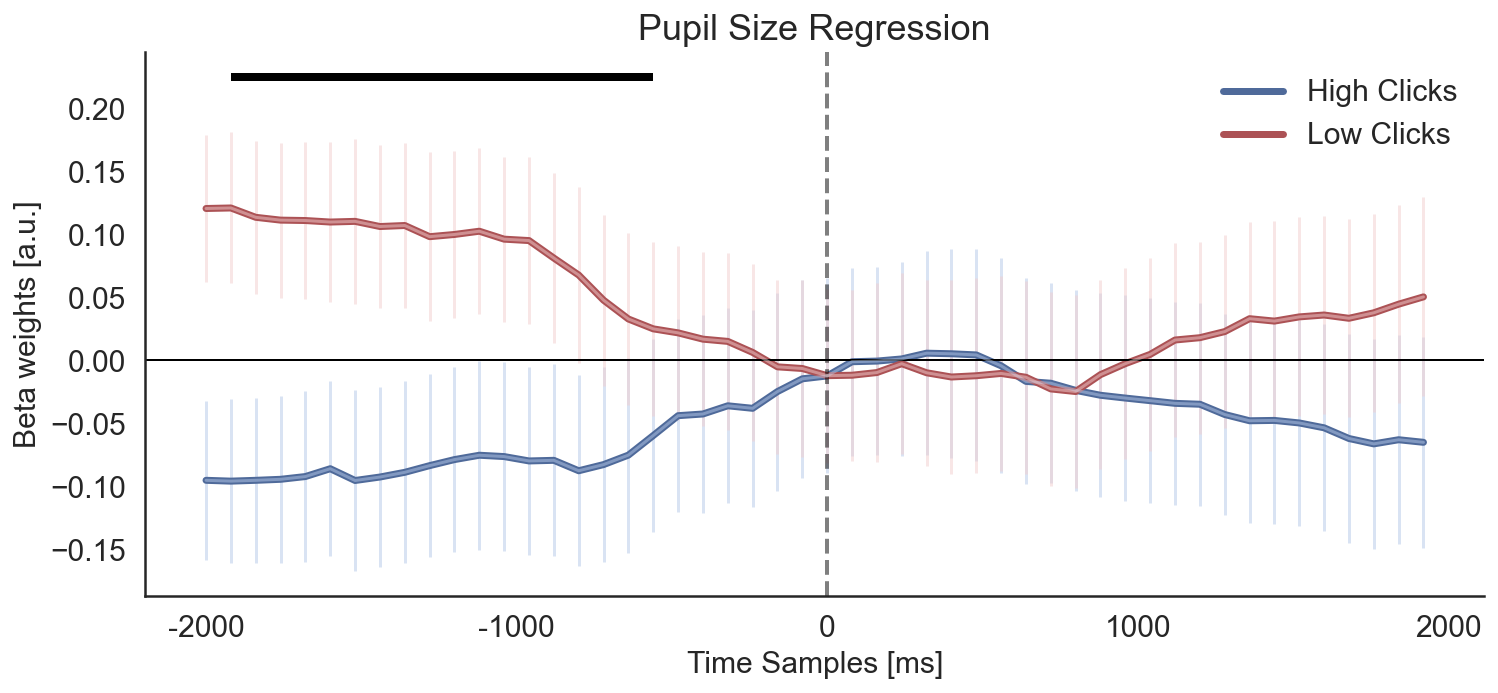

# Regression by frame at individual level

In [213]:
def show_frame_pupil_split_regressPart(pupilBase,event_time,choiceFrameAll,baseP,pupilChoice_X,pupilChoice_Y, splitVar = 'ConfSplit', title = "", labFrame = ['High','Low'],nperm = 100):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    
    # initialize figure
    
    figsize(12, 5)
    
    #fig, (ax1, ax2) = plt.subplots(1, 1, sharey=True)
    
    
    choiceFrameAllH = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
    choiceFrameAllL = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 

    index_high = choiceFrameAllH.index.values
    index_low = choiceFrameAllL.index.values

    
     # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    
 
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    
    # extract pupil position for each frame
    
    pupilChoice_X_H = [pupilChoice_X[i] for i in index_high]
    pupilChoice_Y_H = [pupilChoice_Y[i] for i in index_high]

    pupilChoice_X_L = [pupilChoice_X[i] for i in index_low]
    pupilChoice_Y_L = [pupilChoice_Y[i] for i in index_low]    
    
    
    # run regression analysis for each sample
    
    
    regFormula = "pupil ~ choEv + unchoEv + rt + xpos + ypos"
    betasH = []
    betasL = []
    
    betasErrorH_lower = []
    betasErrorH_upper = []
    
    betasErrorL_lower = []
    betasErrorL_upper = []
    
    betasErrorH_ = []
    betasErrorL_ = []
    
#    pVal_perm = [99]*len(base1[0])
#    pValH_perm = [99]*len(base1[0])
#    pValL_perm = [99]*len(base1[0])
    pVal_perm = []
    pValH_perm = []
    pValL_perm = []

    
    # frame 1
    dfH = pd.DataFrame()
    dfH['choEv'] =  choiceFrameAllH.zChoFreq.values
    dfH['unchoEv'] =  choiceFrameAllH.zUnchoFreq.values
    dfH['part']  = choiceFrameAllH.part.values
    dfH['rt']  = choiceFrameAllH.zRT.values

    
    # frame 2
    dfL = pd.DataFrame()
    dfL['choEv'] =  choiceFrameAllL.zChoFreq.values
    dfL['unchoEv'] =  choiceFrameAllL.zUnchoFreq.values
    dfL['part']  = choiceFrameAllL.part.values    
    dfL['rt']  = choiceFrameAllL.zRT.values
   
    
    for s in range(int(np.round(len(base1[0])))): # extract for each number of sample
        
        # to subsample 
        #if s%8:
        #    continue
        
        #print(s)
        # frame 1
        dfH['pupil'] = column(base1,s)
        dfL['pupil'] = column(base2,s)
        
        dfH['xpos']  = column(pupilChoice_X_H,s)
        dfH['ypos']  = column(pupilChoice_Y_H,s)

        dfL['xpos']  = column(pupilChoice_X_L,s)
        dfL['ypos']  = column(pupilChoice_Y_L,s)        
        
        
        betasH_p = []
        betasL_p = []
        deltaBeta_p = []
        
        
        for part1 in dfH.part.unique():
            
            dfH_p = dfH.loc[dfH['part'] == part1 ]
            dfL_p = dfL.loc[dfL['part'] == part1 ]
        
        
            olsRegH = sm.ols(formula = regFormula, data=dfH_p).fit()
            betasH_p.append(olsRegH.params.values[1])
            #betasErrorH_lower.append(olsRegH.conf_int(alpha=0.05, cols=None)[0].values[1])
            #betasErrorH_upper.append(olsRegH.conf_int(alpha=0.05, cols=None)[1].values[1])
            #betasErrorH_.append(olsRegH.conf_int(alpha=0.05, cols=None)[1].values[1] - olsRegH.conf_int(alpha=0.05, cols=None)[0].values[1])
            
            # frame 2
          
            olsRegL = sm.ols(formula = regFormula, data=dfL_p).fit()
            betasL_p.append(olsRegL.params.values[1])
            #betasErrorL_lower.append(olsRegL.conf_int(alpha=0.05, cols=None)[0].values[1])
            #betasErrorL_upper.append(olsRegL.conf_int(alpha=0.05, cols=None)[1].values[1])
            #betasErrorL_.append(olsRegL.conf_int(alpha=0.05, cols=None)[1].values[1] - olsRegL.conf_int(alpha=0.05, cols=None)[0].values[1])
            
            
            # difference between betas to estimate the threshold for permutation comparison.
            deltaBeta_p.append(olsRegH.params.values[1] - olsRegL.params.values[1])
            
        
        
        betasH.append(np.mean(betasH_p))
        betasL.append(np.mean(betasL_p))
        
        betasErrorH_.append(np.std(betasH_p)/np.sqrt(np.size(betasH_p)))
        betasErrorL_.append(np.std(betasL_p)/np.sqrt(np.size(betasL_p)))
        
        pVal_perm.append(stats.ttest_rel(betasH_p, betasL_p)[1]) # p_value of the diffenrece
        #pValH_perm.append(len(np.where(np.abs(betasH_perm) >= 0)[0])/len(betasH_perm)) # p_value of the permutation test
        #pValL_perm.append(len(np.where(np.abs(betasH_perm) >= 0)[0])/len(betasH_perm)) # p_value of the permutation test
        
    
    
    # plot betas from the regression

    
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(betasH)))
    
    #plot High
    plt.errorbar(xSecs,betasH, yerr= betasErrorH_, color=colorP[2],marker='', alpha = 0.5 );
    plt.plot(xSecs,betasH,color=colorP[0],label = labFrame[0],ls = '-',linewidth=3.5)
    #plot Low frame
    xSecs = np.array(range(0,len(betasL)))

    plt.errorbar(xSecs,betasL, yerr= betasErrorL_, color=colorP[3],marker='', alpha = 0.5 );
    plt.plot(xSecs,betasL,color=colorP[1],label = labFrame[1],ls = '-',linewidth=3.5)
    
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')
    plt.axhline(0, color='black', lw=1, alpha =1 ,ls = '-')

    plt.xlabel("Time Samples [ms]", fontsize = 15)
    plt.ylabel("Beta weights [a.u.]", fontsize = 15)
    
    
    sample_factor = 10
    
    event_time = np.round(len(pVal_perm)/2)

    
    #plt.sca(ax1)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    #ax1.yaxis.label.set_size(15)
    #ax1.xaxis.label.set_size(15)
   
    plt.legend(frameon=False, fontsize = 15)
    plt.title("Pupil Size Regression", fontsize = 18)
    
    
    # plot permutation p-values for the difference between groups
    clusterSize = 6

    
    # FDR correction 0.01 (instead of bonferroni)
    #print(pVal_perm)
    _,pVal_perm_FDR,_,_ = statsmodels.stats.multitest.multipletests(pVal_perm, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)

    
    
    for ii in range(len(pVal_perm_FDR)):
    # count the number of significant value in the cluster, if over 6 then the cluster is significant 
        if ii >clusterSize:
            if np.sum(np.array(pVal_perm_FDR[ii-clusterSize:ii])<0.01) == clusterSize:
                plt.plot(xSecs[ii-clusterSize:ii], [np.max(betasL)+ np.max(betasErrorL_)+0.025]*clusterSize, color='black',linewidth=4,solid_capstyle = 'butt')

    
    print(pVal_perm_FDR)
    sns.set_style("white")
    sns.despine()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

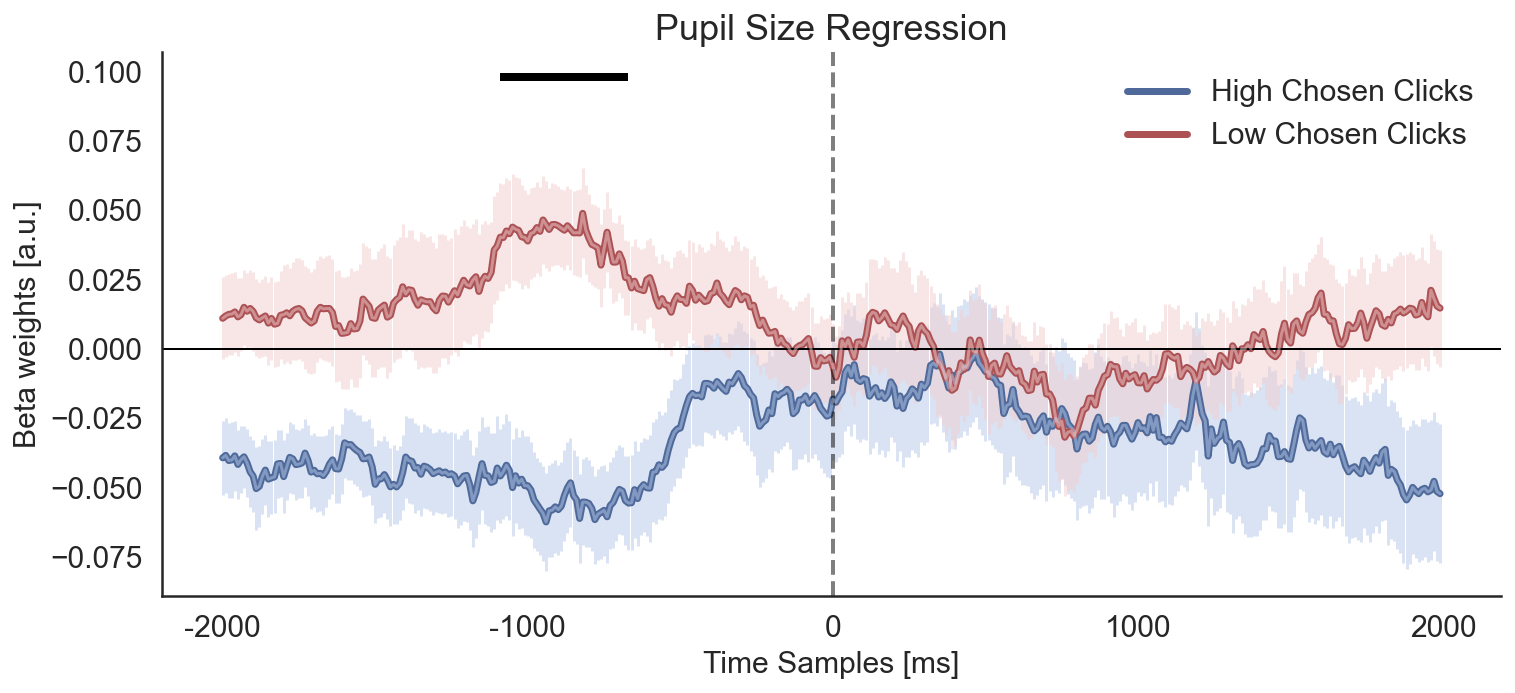

In [215]:
show_frame_pupil_split_regressPart(pupilChoice,len(pupilChoice[1])/2,choiceFrameAll,basePBehav,pupilChoice_X,pupilChoice_Y,'ChoFreqSplit',title = 'Choice, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])


In [ ]:
def show_frame_pupil_split_regress(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "", labFrame = ['High','Low'],nperm = 50):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    
    # initialize figure
    
    figsize(12, 5)
    
    #fig, (ax1, ax2) = plt.subplots(1, 1, sharey=True)
    
    
    choiceFrameAllH = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
    choiceFrameAllL = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 

    index_high = choiceFrameAllH.index.values
    index_low = choiceFrameAllL.index.values

    
     # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    
    
    #baseTimeMean1 =np.nanmean(base1, axis= 0)
    #baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    
    #baseTimeMean2 =np.nanmean(base2, axis= 0)
    #baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    
    
    
    # run regression analysis for each sample
    
    
    regFormula = "pupil ~ choEv + unchoEv"
    betasH = []
    betasL = []
    
    betasErrorH_lower = []
    betasErrorH_upper = []
    
    betasErrorL_lower = []
    betasErrorL_upper = []
    
    betasErrorH_ = []
    betasErrorL_ = []
    
    pVal_perm = [1]*len(base1[0])
    
    for s in range(int(np.round(len(base1[0])/4))): # extract for each number of sample
        
        print(s)
        # frame 1
        dfH = pd.DataFrame()
        dfH['pupil'] = column(base1,s)
        dfH['choEv'] =  choiceFrameAllH.zChoFreq.values
        dfH['unchoEv'] =  choiceFrameAllH.zUnchoFreq.values
        dfH['part']  = choiceFrameAllH.part.values
       
        olsRegH = sm.ols(formula = regFormula, data=dfH).fit()
        betasH.append(olsRegH.params.values[1])
        betasErrorH_lower.append(olsRegH.conf_int(alpha=0.05, cols=None)[0].values[1])
        betasErrorH_upper.append(olsRegH.conf_int(alpha=0.05, cols=None)[1].values[1])
        betasErrorH_.append(olsRegH.conf_int(alpha=0.05, cols=None)[1].values[1] - olsRegH.conf_int(alpha=0.05, cols=None)[0].values[1])
        
        # frame 2
        dfL = pd.DataFrame()
        dfL['pupil'] = column(base2,s)
        dfL['choEv'] =  choiceFrameAllL.zChoFreq.values
        dfL['unchoEv'] =  choiceFrameAllL.zUnchoFreq.values
        dfL['part']  = choiceFrameAllL.part.values
       
        olsRegL = sm.ols(formula = regFormula, data=dfL).fit()
        betasL.append(olsRegL.params.values[1])
        betasErrorL_lower.append(olsRegL.conf_int(alpha=0.05, cols=None)[0].values[1])
        betasErrorL_upper.append(olsRegL.conf_int(alpha=0.05, cols=None)[1].values[1])
        betasErrorL_.append(olsRegL.conf_int(alpha=0.05, cols=None)[1].values[1] - olsRegL.conf_int(alpha=0.05, cols=None)[0].values[1])
        
        
        # difference between betas to estimate the threshold for permutation comparison.
        deltaBeta = olsRegH.params.values[1] - olsRegL.params.values[1]
        
        # run permutations for this sample
        
        
        #betas1_perm = []
        #betas2_perm = []
        deltaBetas_perm = []
        for p in range(0,nperm):
            
            # shuffle the trials between groups (frames)
            df1_shuff, df2_shuff = shuffleDF(dfH,dfL)
        
            # calculate regression for permutation dataframe1
            olsReg1_perm = sm.ols(formula = regFormula, data=df1_shuff).fit()
            #betas1_perm.append(olsReg1_perm.params.values[1])
            
            # calculate regression for permutation dataframe2
            olsReg2_perm = sm.ols(formula = regFormula, data=df2_shuff).fit()
            #betas2_perm.append(olsReg2_perm.params.values[1])
         
            deltaBetas_perm.append(olsReg1_perm.params.values[1] - olsReg2_perm.params.values[1])

        
        pVal_perm.append(len(np.where(deltaBetas_perm >= deltaBeta))/len(deltaBetas_perm)) # p_value of the permutation test
  
    
    
    # plot betas from the regression

    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(betasH)))
    
    #plot High
    plt.errorbar(xSecs,betasH, yerr= betasErrorH_, color=colorP[2],marker='', alpha = 0.5 );
    plt.plot(xSecs,betasH,color=colorP[0],label = labFrame[0],ls = '-',linewidth=3.5)
    #plot Low frame
    xSecs = np.array(range(0,len(betasL)))

    plt.errorbar(xSecs,betasL, yerr= betasErrorL_, color=colorP[3],marker='', alpha = 0.5 );
    plt.plot(xSecs,betasL,color=colorP[1],label = labFrame[1],ls = '-',linewidth=3.5)
    
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')
    plt.axhline(0, color='black', lw=1, alpha =1 ,ls = '-')

    plt.xlabel("Time Samples [ms]")
    plt.ylabel("Beta weights [a.u.]")
    
    
    sample_factor = 10
    
    #plt.sca(ax1)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    #ax1.yaxis.label.set_size(15)
    #ax1.xaxis.label.set_size(15)
   
    plt.legend(frameon=False, fontsize = 15)
    plt.title("Pupil Size Regression", fontsize = 18)
    
    
    # plot permutation p-values for the difference between groups
    clusterSize = 1

    for ii in range(len(pVal_perm)):
    # count the number of significant value in the cluster, if over 6 then the cluster is significant 
        if ii >clusterSize:
            if np.sum(np.array(pVal_perm[ii-clusterSize:ii])<0.01) == clusterSize:
                plt.plot(xSecs[ii-clusterSize:ii], [np.max(betasL)+0.025]*clusterSize, color='black',linewidth=4,solid_capstyle = 'butt')

    
    
    sns.set_style("white")
    sns.despine()

--------------------------------------

# 4.5 Simple GLM Predecision

In [116]:
pupMeanPreDecis = []
for i in range(len(pupilChoice)):
    pupMeanPreDecis.append(np.mean(pupilChoice[i][100:200])) # pick predecision time

In [117]:
len(pupMeanPreDecis)

5603

In [118]:
choiceFrameAll['pupilPreDecAvg'] =  pupMeanPreDecis

In [119]:
choiceFrameAllH = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
choiceFrameAllL = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 

In [120]:
%R -i choiceFrameAllH -i choiceFrameAllL

In [121]:
%%R
ModelPupilH_1 <- glm(pupilPreDecAvg ~ correct+ zConf + zAbsDFreq + zTotFreq , data=choiceFrameAllH)
ModelPupilL_1 <- glm(pupilPreDecAvg ~ correct + zConf + zAbsDFreq + zTotFreq, data=choiceFrameAllL)


Call:
glm(formula = pupilPreDecAvg ~ correct + zConf + zAbsDFreq + 
    zTotFreq, data = choiceFrameAllH)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.58387  -0.22778   0.08276   0.31834   1.34794  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.586499   0.023029  25.467  < 2e-16 ***
correct      0.066780   0.026025   2.566   0.0103 *  
zConf        0.051019   0.010433   4.890 1.07e-06 ***
zAbsDFreq   -0.014460   0.010270  -1.408   0.1592    
zTotFreq    -0.001142   0.009597  -0.119   0.9053    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2501036)

    Null deviance: 708.63  on 2799  degrees of freedom
Residual deviance: 699.04  on 2795  degrees of freedom
AIC: 4072.6

Number of Fisher Scoring iterations: 2


Call:
glm(formula = pupilPreDecAvg ~ correct + zConf + zAbsDFreq + 
    zTotFreq, data = choiceFrameAllL)

Deviance Residuals: 
    

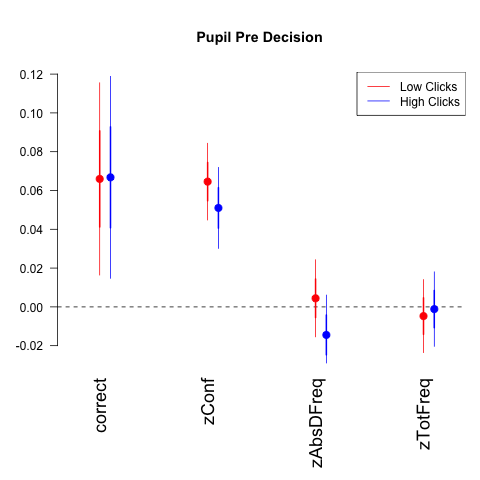

In [122]:
%%R
title_plot = "Pupil Pre Decision "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

# 5. GLM model on pupil

## Pick trials course --  select between pupil info between ITI_APPEAR (moment beginning trial) and  CHOICE_FEEDBACK_TIMER (moment confidence screen will appear)

## canonical pupil response function (as used in Lempert et al., 2015; de Gee et al., 2014)

In [123]:
t = range(300)
s = 1/10**(27)
w = 10.1
tmax = 930 #[ms]
sample_factor = 10 # 100 Hz sampling


h = []
for ti in t:
    h.append(s*(ti*sample_factor)**w*exp(-(ti*sample_factor)*w/tmax)) # we multiply by sample_factor to adjust for sampling

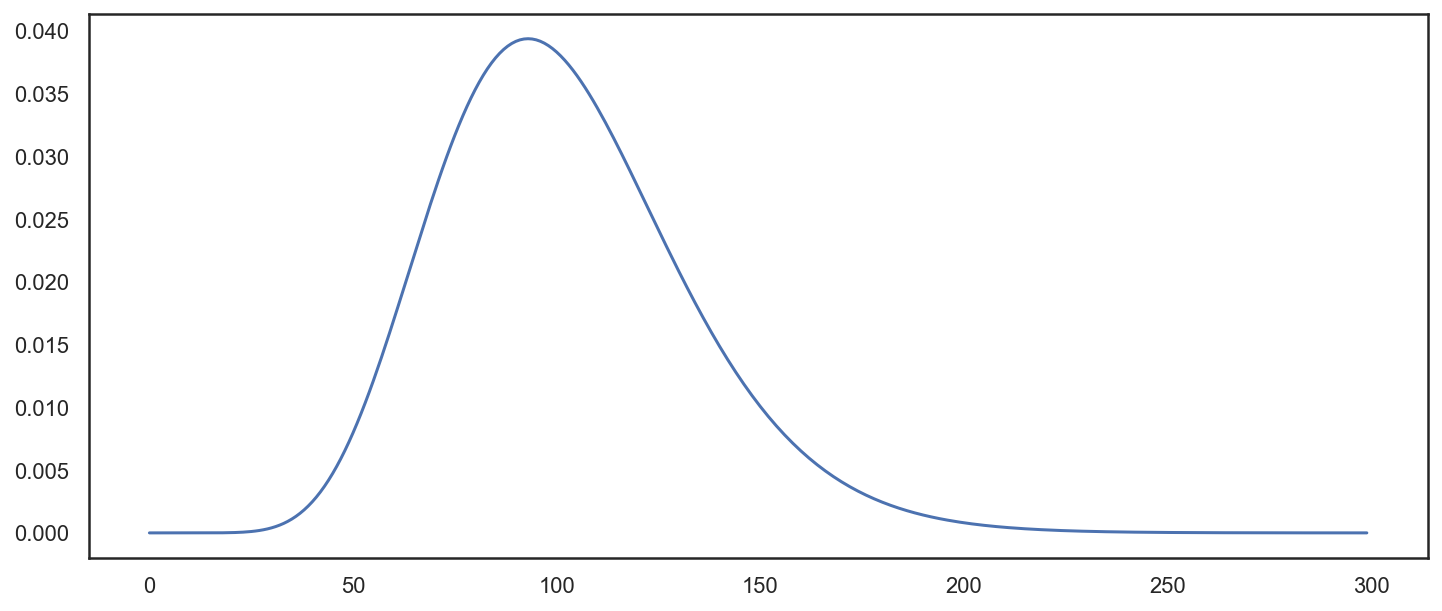

In [124]:
plt.plot(h)

# Estimate regressors , no frame separation

In [125]:
pupilTrialAll = []
devIdxTrialAll = []
# initialize regressors trials together
regSndOnsetlAll = []
regChoOnsetlAll = []
regPreDecAll = []
regPostDeclAll = []

regSndOnsetlAll_C = []
regChoOnsetlAll_C = []
regPreDecAll_C= []
regPostDeclAll_C = []

regSndOnsetlAll_D = []
regChoOnsetlAll_D = []
regPreDecAll_D = []
regPostDeclAll_D = []

beginTrialIdx = pupiIdxBehav['itiIdx'].values.astype(int)
endTrialIdx = pupiIdxBehav['confBeginIdx'].values.astype(int)

j = 0
for i in beginTrialIdx:
    
    trialPupilIter = pupilInfo.iloc[ i : endTrialIdx[j]]
    
    # define regressors:
    regSndOnset = ((trialPupilIter.SAMPLE_MESSAGE.str.contains('FIRST_SOUND_R'))*1).values # regressor for stimulus onset
    regChoiceOnset = (((trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_R')) | (trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_L')))*1).values # regressor for choice onset

    
    
    # boxcar regressor pre-decision
    reg0 = np.zeros(len(regSndOnset))
    reg0Begin = np.where(regSndOnset == 1)[0][0] # from the sound presentation
    reg0End = np.where(regChoiceOnset == 1)[0][0] # to the choice
    
    regLen = len(reg0[reg0Begin:reg0End])    
    reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
    regPreDecision = reg0
    
    # boxcar regressor post-decision
    reg0 = np.zeros(len(regSndOnset))
    reg0Begin = np.where(regChoiceOnset == 1)[0][0] # from the choice
    reg0End = len(regSndOnset) # to the end of the trial
    
    regLen = len(reg0[reg0Begin:reg0End])    
    reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
    regPostDecision = reg0
 
    # add pupil data
    pupilTrialAll.extend(trialPupilIter.zPupil.values)

    # add deviation index data
    devIdxTrialAll.extend(trialPupilIter.zDevIdx.values)
    
    # calculate convolved regressors
    conRegSndOnset =  numpy.convolve(regSndOnset, h, mode='full')[0:len(regSndOnset)]
    conRegChoiceOnset = numpy.convolve(regChoiceOnset, h, mode='full')[0:len(regChoiceOnset)]
    conRegPreDecision = numpy.convolve(regPreDecision, h, mode='full')[0:len(regPreDecision)]
    conRegPostDecision = numpy.convolve(regPostDecision, h, mode='full')[0:len(regPostDecision)]
    
    # add up the regressor
    regSndOnsetlAll.extend(conRegSndOnset)
    regChoOnsetlAll.extend(conRegChoiceOnset)
    regPreDecAll.extend(conRegPreDecision)
    regPostDeclAll.extend(conRegPostDecision)
    
    
    # extract parametric modulators from behaviour.
    confParamIter = choiceFrameAll.iloc[j].zConf    
    absDFreqParamIter = choiceFrameAll.iloc[j].zAbsDFreq    
    
    # confidence modulated regressor
    regSndOnsetlAll_C.extend(conRegSndOnset*confParamIter)
    regChoOnsetlAll_C.extend(conRegChoiceOnset*confParamIter)
    regPreDecAll_C.extend(conRegPreDecision*confParamIter)
    regPostDeclAll_C.extend(conRegPostDecision*confParamIter)
    
    # difficulty modulated regressor
    regSndOnsetlAll_D.extend(conRegSndOnset*absDFreqParamIter)
    regChoOnsetlAll_D.extend(conRegChoiceOnset*absDFreqParamIter)
    regPreDecAll_D.extend(conRegPreDecision*absDFreqParamIter)
    regPostDeclAll_D.extend(conRegPostDecision*absDFreqParamIter)

    j = j + 1
    
pupilRegressModel = pd.DataFrame()   
pupilRegressModel['pupil'] = pupilTrialAll
pupilRegressModel['DevIdx'] = devIdxTrialAll
pupilRegressModel['SndOnset']=regSndOnsetlAll
pupilRegressModel['ChoOnset']=regChoOnsetlAll
pupilRegressModel['PreDecis']=regPreDecAll
pupilRegressModel['PostDecis']=regPostDeclAll
pupilRegressModel['CxSndOnset']=regSndOnsetlAll_C
pupilRegressModel['CxChoOnset']=regChoOnsetlAll_C
pupilRegressModel['CxPreDecis']=regPreDecAll_C
pupilRegressModel['CxPostDecis']=regPostDeclAll_C
pupilRegressModel['DxSndOnset']=regSndOnsetlAll_D
pupilRegressModel['DxChoOnset']=regChoOnsetlAll_D
pupilRegressModel['DxPreDecis']=regPreDecAll_D
pupilRegressModel['DxPostDecis']=regPostDeclAll_D

In [126]:
pupilRegressModel

,pupil,DevIdx,SndOnset,ChoOnset,PreDecis,PostDecis,CxSndOnset,CxChoOnset,CxPreDecis,CxPostDecis,DxSndOnset,DxChoOnset,DxPreDecis,DxPostDecis
0,0.782271,0.087915,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
1,0.789211,0.064633,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
2,0.797680,0.092280,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
3,0.806513,0.104091,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
4,0.814121,0.139015,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142478,0.552372,1.278132,0.0,0.000001,1.327599e-08,0.009677,0.0,2.781076e-07,2.938777e-09,0.002142,0.0,7.576119e-07,8.005721e-09,0.005835
4142479,0.546758,1.275287,0.0,0.000001,8.516330e-09,0.009677,0.0,2.581318e-07,1.885178e-09,0.002142,0.0,7.031943e-07,5.135540e-09,0.005835
4142480,0.543263,1.239483,0.0,0.000001,4.099056e-09,0.009677,0.0,2.395633e-07,9.073683e-10,0.002142,0.0,6.526106e-07,2.471824e-09,0.005835
4142481,0.540576,1.151267,0.0,0.000001,0.000000e+00,0.009677,0.0,2.223052e-07,0.000000e+00,0.002142,0.0,6.055968e-07,0.000000e+00,0.005835


In [127]:
%R -i pupilRegressModel

In [128]:
%%R
title_plot = "Pupil "

ModelChoiceH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis + PostDecis + CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis +  DxSndOnset+DxChoOnset+ DxPreDecis+DxPostDecis  , data=pupilRegressModel)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + PostDecis + 
    CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis + DxSndOnset + 
    DxChoOnset + DxPreDecis + DxPostDecis, data = pupilRegressModel)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.2308  -0.3388   0.0994   0.4429   3.5661  

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.2320003  0.0005481 -423.251  < 2e-16 ***
SndOnset     7.2799107  0.0377646  192.771  < 2e-16 ***
ChoOnset    -1.6451294  0.0390346  -42.145  < 2e-16 ***
PreDecis    67.8958163  0.0716809  947.195  < 2e-16 ***
PostDecis   73.8744687  0.0956775  772.119  < 2e-16 ***
CxSndOnset   0.5565484  0.0378043   14.722  < 2e-16 ***
CxChoOnset   0.9277916  0.0406456   22.826  < 2e-16 ***
CxPreDecis  -5.1379227  0.0654148  -78.544  < 2e-16 ***
CxPostDecis -1.9780039  0.0811342  -24.379  < 2e-16 ***
DxSndOnset  -0.0661555  0.0384433   -1.721   0.0853 .  
DxChoOnset  -0.2275597  0.0412881   -5.5

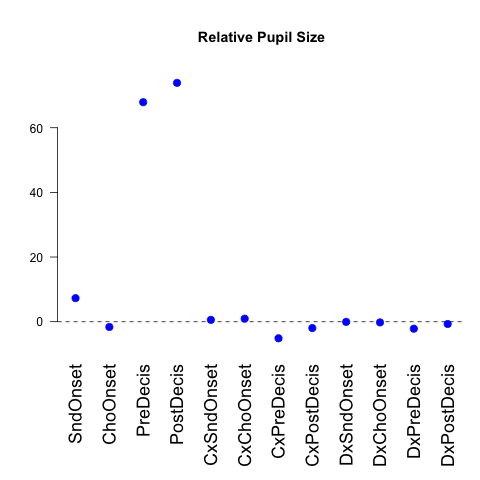

In [129]:
%%R

print(summary(ModelChoiceH_1))
BIC1 = BIC(ModelChoiceH_1)

print("High BIC:")
print(BIC1)
title_plot = "Relative Pupil Size"
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),,main=title_plot)

## Same regression but including deviation index (eye movement) as a regressor

In [130]:
%%R
title_plot = "Pupil "

ModelChoiceH_1 <- glm(pupil ~ DevIdx + SndOnset + ChoOnset + PreDecis + PostDecis + CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis +  DxSndOnset+DxChoOnset+ DxPreDecis+DxPostDecis  , data=pupilRegressModel)


Call:
glm(formula = pupil ~ DevIdx + SndOnset + ChoOnset + PreDecis + 
    PostDecis + CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis + 
    DxSndOnset + DxChoOnset + DxPreDecis + DxPostDecis, data = pupilRegressModel)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.9393  -0.3394   0.0977   0.4412   4.1395  

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -2.226e-01  5.497e-04 -405.033  < 2e-16 ***
DevIdx      -3.760e-04  2.281e-06 -164.795  < 2e-16 ***
SndOnset     7.001e+00  3.772e-02  185.607  < 2e-16 ***
ChoOnset    -1.680e+00  3.895e-02  -43.125  < 2e-16 ***
PreDecis     6.890e+01  7.179e-02  959.737  < 2e-16 ***
PostDecis    7.353e+01  9.548e-02  770.094  < 2e-16 ***
CxSndOnset   5.774e-01  3.771e-02   15.313  < 2e-16 ***
CxChoOnset   9.559e-01  4.054e-02   23.579  < 2e-16 ***
CxPreDecis  -5.237e+00  6.525e-02  -80.258  < 2e-16 ***
CxPostDecis -1.978e+00  8.093e-02  -24.441  < 2e-16 ***
DxSndOnset  -5.180e-02  3.835e-

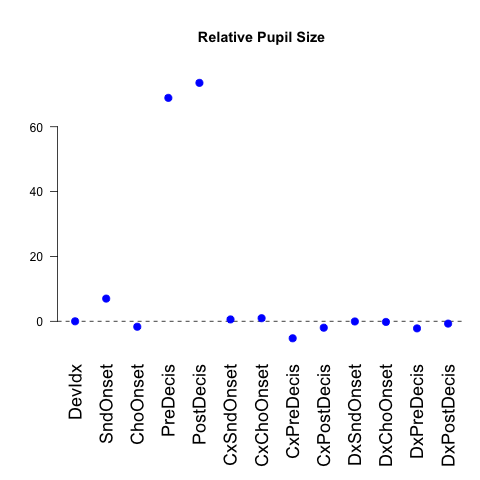

In [131]:
%%R

print(summary(ModelChoiceH_1))
BIC1 = BIC(ModelChoiceH_1)

print("High BIC:")
print(BIC1)
title_plot = "Relative Pupil Size"
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),,main=title_plot)

# Separate by frame GLM analysis, focus only on predecision effects for simplicity

In [132]:
def generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,frameIdx):
    pupilTrialAll = []
    # initialize regressors trials together
    regSndOnsetlAll = []
    regChoOnsetlAll = []
    regPreDecAll = []
   # regPostDeclAll = []
    
    regSndOnsetlAll_C = []
    regChoOnsetlAll_C = []
    regPreDecAll_C= []
   # regPostDeclAll_C = []
    
    regSndOnsetlAll_D = []
    regChoOnsetlAll_D = []
    regPreDecAll_D = []
   # regPostDeclAll_D = []

    regSndOnsetlAll_Cho = []
    regChoOnsetlAll_Cho = []
    regPreDecAll_Cho = []
    
    regSndOnsetlAll_unCho = []
    regChoOnsetlAll_unCho = []
    regPreDecAll_unCho = []
     
    regSndOnsetlAll_SumCli = []
    regChoOnsetlAll_SumCli = []
    regPreDecAll_SumCli = []

    partInfo = []
    
    # extract trials from the relevant frame
    
    choiceFrameSelect =  choiceFrameAll.loc[choiceFrameAll['frame'] == frameIdx]
    indexFrame = choiceFrameSelect.index.values # select only the frame relevant trials 
    
    pupiIdxBehavFrame = pupiIdxBehav.iloc[indexFrame]
    
    beginTrialIdx = pupiIdxBehavFrame['itiIdx'].values.astype(int)
    endTrialIdx = pupiIdxBehavFrame['confBeginIdx'].values.astype(int)
    
    j = 0
    for i in beginTrialIdx:
        
        trialPupilIter = pupilInfo.iloc[ i : endTrialIdx[j]]
        
        # define regressors:
        regSndOnset = ((trialPupilIter.SAMPLE_MESSAGE.str.contains('FIRST_SOUND_R'))*1).values # regressor for stimulus onset
        regChoiceOnset = (((trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_R')) | (trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_L')))*1).values # regressor for choice onset
    
        
        
        # boxcar regressor pre-decision
        reg0 = np.zeros(len(regSndOnset))
        reg0Begin = np.where(regSndOnset == 1)[0][0] # from the sound presentation
        reg0End = np.where(regChoiceOnset == 1)[0][0] # to the choice
        
        regLen = len(reg0[reg0Begin:reg0End])    
        reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
        regPreDecision = reg0
        
        ## boxcar regressor post-decision
        #reg0 = np.zeros(len(regSndOnset))
        #reg0Begin = np.where(regChoiceOnset == 1)[0][0] # from the choice
        #reg0End = len(regSndOnset) # to the end of the trial
        #
        #regLen = len(reg0[reg0Begin:reg0End])    
        #reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
        #regPostDecision = reg0
        
        # add pupil data
        pupilTrialAll.extend(trialPupilIter.zPupil.values)
        
        # calculate convolved regressors
        conRegSndOnset =  numpy.convolve(regSndOnset, h, mode='full')[0:len(regSndOnset)]
        conRegChoiceOnset = numpy.convolve(regChoiceOnset, h, mode='full')[0:len(regChoiceOnset)]
        conRegPreDecision = numpy.convolve(regPreDecision, h, mode='full')[0:len(regPreDecision)]
       # conRegPostDecision = numpy.convolve(regPostDecision, h, mode='full')[0:len(regPostDecision)]
        
        # add up the regressor
        regSndOnsetlAll.extend(conRegSndOnset)
        regChoOnsetlAll.extend(conRegChoiceOnset)
        regPreDecAll.extend(conRegPreDecision)
       # regPostDeclAll.extend(conRegPostDecision)
        
        ################################################
        # extract parametric modulators from behaviour.#
        ################################################
        
        confParamIter = choiceFrameSelect.iloc[j].zConf    
        absDFreqParamIter = choiceFrameSelect.iloc[j].zAbsDFreq    
        choFreqParamIter = choiceFrameSelect.iloc[j].zChoFreq    
        unchoFreqParamIter = choiceFrameSelect.iloc[j].zUnchoFreq    
        sumFreqParamIter = choiceFrameSelect.iloc[j].zTotFreq    

        partIter = choiceFrameSelect.iloc[j].part    

        
        # confidence modulated regressor
        regSndOnsetlAll_C.extend(conRegSndOnset*confParamIter)
        regChoOnsetlAll_C.extend(conRegChoiceOnset*confParamIter)
        regPreDecAll_C.extend(conRegPreDecision*confParamIter)
      #  regPostDeclAll_C.extend(conRegPostDecision*confParamIter)
        
        # difficulty modulated regressor
        regSndOnsetlAll_D.extend(conRegSndOnset*absDFreqParamIter)
        regChoOnsetlAll_D.extend(conRegChoiceOnset*absDFreqParamIter)
        regPreDecAll_D.extend(conRegPreDecision*absDFreqParamIter)
      #  regPostDeclAll_D.extend(conRegPostDecision*absDFreqParamIter)

        regSndOnsetlAll_Cho.extend(conRegSndOnset*choFreqParamIter)
        regChoOnsetlAll_Cho.extend(conRegChoiceOnset*choFreqParamIter)    
        regPreDecAll_Cho.extend(conRegPreDecision*choFreqParamIter)
        
        regSndOnsetlAll_unCho.extend(conRegSndOnset*unchoFreqParamIter)
        regChoOnsetlAll_unCho.extend(conRegChoiceOnset*unchoFreqParamIter)    
        regPreDecAll_unCho.extend(conRegPreDecision*unchoFreqParamIter)
        
        
        regSndOnsetlAll_SumCli.extend(conRegSndOnset*sumFreqParamIter)
        regChoOnsetlAll_SumCli.extend(conRegChoiceOnset*sumFreqParamIter)    
        regPreDecAll_SumCli.extend(conRegPreDecision*sumFreqParamIter)
        
        
        partInfo.extend([partIter]*len(conRegPreDecision)) # add column including participant information

    
        j = j + 1
        
    pupilRegressModel = pd.DataFrame()   
    pupilRegressModel['pupil'] = pupilTrialAll
    pupilRegressModel['SndOnset']=regSndOnsetlAll
    pupilRegressModel['ChoOnset']=regChoOnsetlAll
    pupilRegressModel['PreDecis']=regPreDecAll
   # pupilRegressModel['PostDecis']=regPostDeclAll
    pupilRegressModel['CxSndOnset']=regSndOnsetlAll_C
    pupilRegressModel['CxChoOnset']=regChoOnsetlAll_C
    pupilRegressModel['CxPreDecis']=regPreDecAll_C
   # pupilRegressModel['CxPostDecis']=regPostDeclAll_C
    pupilRegressModel['DxSndOnset']=regSndOnsetlAll_D
    pupilRegressModel['DxChoOnset']=regChoOnsetlAll_D
    pupilRegressModel['DxPreDecis']=regPreDecAll_D
   # pupilRegressModel['DxPostDecis']=regPostDeclAll_D
    
    # chosen option regressors
    pupilRegressModel['ChoCxSndOnset']=regSndOnsetlAll_Cho
    pupilRegressModel['ChoCxChoOnset']=regChoOnsetlAll_Cho
    pupilRegressModel['ChoCxPreDecis']=regPreDecAll_Cho
    
    # unchosen option regressors
    pupilRegressModel['uChoCxSndOnset']=regSndOnsetlAll_unCho
    pupilRegressModel['uChoCxChoOnset']=regChoOnsetlAll_unCho
    pupilRegressModel['uChoCxPreDecis']=regPreDecAll_unCho
    
    # sum chosen regressors
    pupilRegressModel['SumCxSndOnset']=regSndOnsetlAll_SumCli
    pupilRegressModel['SumCxChoOnset']=regChoOnsetlAll_SumCli
    pupilRegressModel['SumCxPreDecis']=regPreDecAll_SumCli

    pupilRegressModel['Part']=partInfo
    
    
    return pupilRegressModel

In [133]:
pupilRegressModelH = generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,1)
pupilRegressModelL = generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,2)

In [134]:
%R -i pupilRegressModelH -i pupilRegressModelL

## regression separated by frame using $\Sigma$Clicks

In [135]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + SumCxSndOnset + SumCxChoOnset + SumCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + SumCxSndOnset + SumCxChoOnset + SumCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    SumCxSndOnset + SumCxChoOnset + SumCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.9186  -0.3722   0.0992   0.4949   2.7846  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0149680  0.0006731  22.237  < 2e-16 ***
SndOnset       4.3618284  0.0573188  76.098  < 2e-16 ***
ChoOnset       7.7297535  0.0571730 135.199  < 2e-16 ***
PreDecis      45.4075474  0.1031247 440.317  < 2e-16 ***
CxSndOnset     0.4285112  0.0594125   7.212 5.50e-13 ***
CxChoOnset     0.0347532  0.0592172   0.587  0.55729    
CxPreDecis    -2.1195921  0.1027028 -20.638  < 2e-16 ***
DxSndOnset    -0.2563626  0.0592315  -4.328 1.50e-05 ***
DxChoOnset    -0.5929213  0.0590022 -10.049  < 2e-16 ***
DxPreDecis    -1.1842884  0.0979821 -12.087  < 2e-16 ***
SumCxSndOnset -0.031

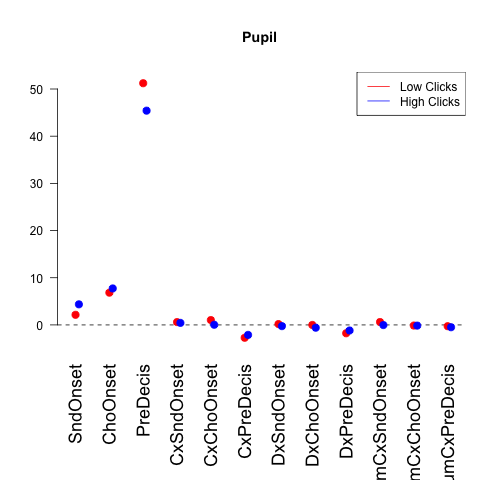

In [136]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

## regression separated by frame using Chosen Clicks number

In [137]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.9149  -0.3723   0.0993   0.4949   2.7847  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0148328  0.0006732  22.034  < 2e-16 ***
SndOnset       4.4286738  0.0671010  66.000  < 2e-16 ***
ChoOnset       7.7277973  0.0669222 115.474  < 2e-16 ***
PreDecis      46.0858064  0.1201868 383.451  < 2e-16 ***
CxSndOnset     0.4344294  0.0591955   7.339 2.15e-13 ***
CxChoOnset     0.0493443  0.0589997   0.836  0.40296    
CxPreDecis    -2.0456003  0.1021794 -20.020  < 2e-16 ***
DxSndOnset    -0.2042919  0.0659445  -3.098  0.00195 ** 
DxChoOnset    -0.6015948  0.0656999  -9.157  < 2e-16 ***
DxPreDecis    -0.6454692  0.1101621  -5.859 4.65e-09 ***
ChoCxSndOnset -0.133

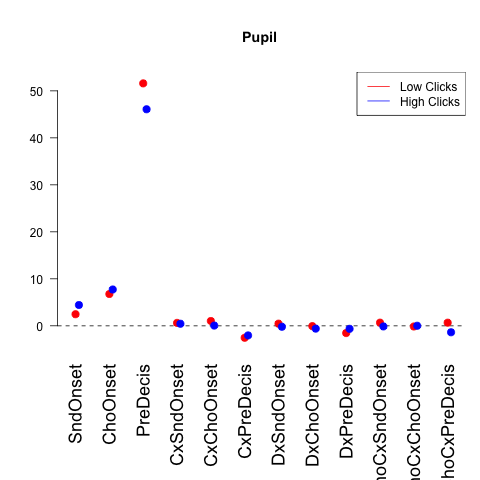

In [138]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

## regression separated by frame using Chosen and unchosen Clicks number

In [139]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + uChoCxChoOnset + uChoCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + uChoCxChoOnset + uChoCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + 
    uChoCxChoOnset + uChoCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.9134  -0.3724   0.0993   0.4948   2.7849  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0146973  0.0006734  21.827  < 2e-16 ***
SndOnset        4.5594443  0.0865857  52.658  < 2e-16 ***
ChoOnset        7.4191551  0.0863624  85.907  < 2e-16 ***
PreDecis       46.8944213  0.1567033 299.256  < 2e-16 ***
CxSndOnset      0.4657618  0.0608222   7.658 1.89e-14 ***
CxChoOnset     -0.0300882  0.0606225  -0.496  0.61967    
CxPreDecis     -1.8533559  0.1050010 -17.651  < 2e-16 ***
DxSndOnset     -0.1047949  0.0783845  -1.337  0.18124    
DxChoOnset     -0.8428223  0.0781239 -10.788  < 2e-16 ***
DxPreDecis 

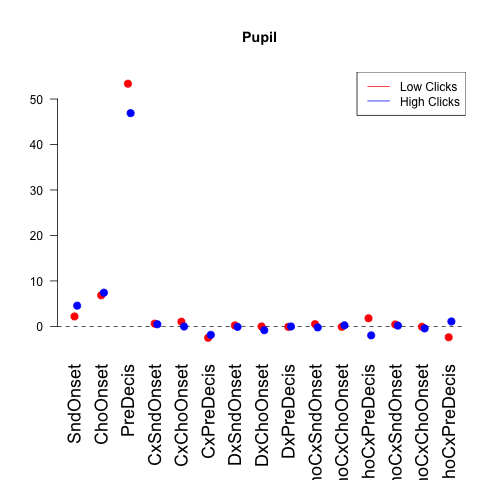

In [140]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + 
    uChoCxChoOnset + uChoCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.9134  -0.3724   0.0993   0.4948   2.7849  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0146973  0.0006734  21.827  < 2e-16 ***
SndOnset        4.5594443  0.0865857  52.658  < 2e-16 ***
ChoOnset        7.4191551  0.0863624  85.907  < 2e-16 ***
PreDecis       46.8944213  0.1567033 299.256  < 2e-16 ***
CxSndOnset      0.4657618  0.0608222   7.658 1.89e-14 ***
CxChoOnset     -0.0300882  0.0606225  -0.496  0.61967    
CxPreDecis     -1.8533559  0.1050010 -17.651  < 2e-16 ***
DxSndOnset     -0.1047949  0.0783845  -1.337  0.18124    
DxChoOnset     -0.8428223  0.0781239 -10.788  < 2e-16 ***
DxPreDecis 

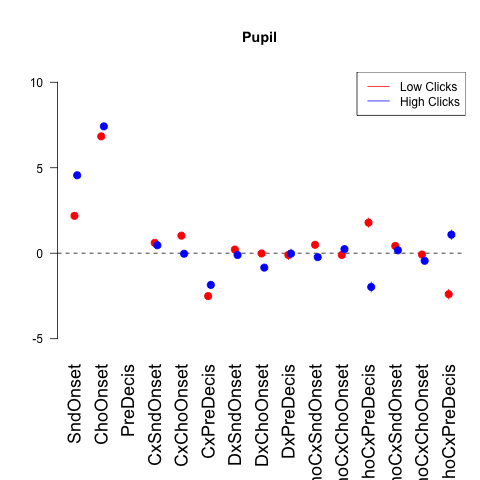

In [141]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),ylim = c(-5,10)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

# Hierarchical GLM, splitted by frame

In [ ]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~   ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + (ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


In [ ]:
# FULL MODEL TAKES TOO LONG TO RUN.

# from pymer4.models import Lmer
# #
# regFormula1 = "pupil ~   SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + (SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis|Part)"
# #
# model1 = Lmer(regFormula1, data=pupilRegressModelH)
# model2 = Lmer(regFormula1, data=pupilRegressModelL)
# 
# #
# model1.fit()
# model2.fit()
# 
# table_data1 = model1.coefs.T
# par_table_data1 = model1.fixef
# 
# table_data2 = model2.coefs.T
# par_table_data2 = model2.fixef
# 

In [ ]:
table_data1

In [ ]:
table_data2

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

In [ ]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

In [ ]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

In [ ]:
print(np.mean(par_table_data1.ChoCxPreDecis.values))
print(np.mean(par_table_data2.ChoCxPreDecis.values))
print(np.mean(par_table_data1.ChoCxPreDecis.values) - np.mean(par_table_data2.ChoCxPreDecis.values))

# Hierarchical GLM, splitted by frame, include chosen and unchosen

In [142]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~  PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis + ( PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 12 negative eigenvalues 

Formula: pupil~PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis+uChoCxPreDecis+(PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis+uChoCxPreDecis|Part)

Family: gaussian	 Inference: parametric

Number of observations: 2063335	 Groups: {'Part': 32.0}

Log-likelihood: -2272786.669 	 AIC: 4545573.339

Random effects:

                    Name       Var     Std
Part         (Intercept)     0.012   0.108
Part            PreDecis  1108.930  33.301
Part          CxPreDecis    32.604   5.710
Part          DxPreDecis    26.257   5.124
Part       ChoCxPreDecis    45.315   6.732
Part      uChoCxPreDecis    41.236   6.422
Residual                     0.530   0.728

                IV1             IV2   Corr
Part    (Intercept)        PreDecis -0.702
Part    (Intercept)      CxPreDecis  0.382
Part    (Intercept)      DxPreDecis -0.067
Part    (Intercept)   ChoCxPreDecis  0.199
Part    (Intercept)

In [143]:
table_data1

,(Intercept),PreDecis,CxPreDecis,DxPreDecis,ChoCxPreDecis,uChoCxPreDecis
Estimate,0.0415611,51.8599,-2.80033,0.110349,-1.34359,0.156936
2.5_ci,0.00408471,40.3149,-4.78767,-1.69092,-3.70236,-2.09324
97.5_ci,0.0790375,63.4049,-0.812989,1.91162,1.01517,2.40711
SE,0.019121,5.89042,1.01397,0.919034,1.20347,1.14807
DF,37.8694,41.0666,34.5954,29.5333,28.7046,31.0136
T-stat,2.17359,8.80411,-2.76175,0.120071,-1.11643,0.136696
P-val,0.0360573,5.29301e-11,0.00913907,0.90524,0.273498,0.892155
Sig,*,***,**,,,


In [144]:
table_data2

,(Intercept),PreDecis,CxPreDecis,DxPreDecis,ChoCxPreDecis,uChoCxPreDecis
Estimate,0.0299715,59.4468,-2.0378,-0.633566,0.799047,-0.956727
2.5_ci,-0.00584176,49.3296,-3.82608,-2.24852,-1.12015,-3.15359
97.5_ci,0.0657847,69.5639,-0.249513,0.981392,2.71824,1.24014
SE,0.0182724,5.16192,0.912406,0.823974,0.979198,1.12087
DF,36.9886,42.2168,31.267,28.9103,30.629,29.1531
T-stat,1.64026,11.5164,-2.23343,-0.768916,0.816022,-0.853558
P-val,0.109429,1.30666e-14,0.0328104,0.44818,0.420789,0.400309
Sig,,***,*,,,


([<matplotlib.axis.XTick at 0x7fc7da12b4a8>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'PreDecis'),
  Text(3.25, 0, 'ConfxPreDecis'),
  Text(4.25, 0, '|ΔClicks|xPreDecis'),
  Text(5.25, 0, 'ChoClicksxPreDecis'),
  Text(6.25, 0, 'UnchoClicksxPreDecis')])

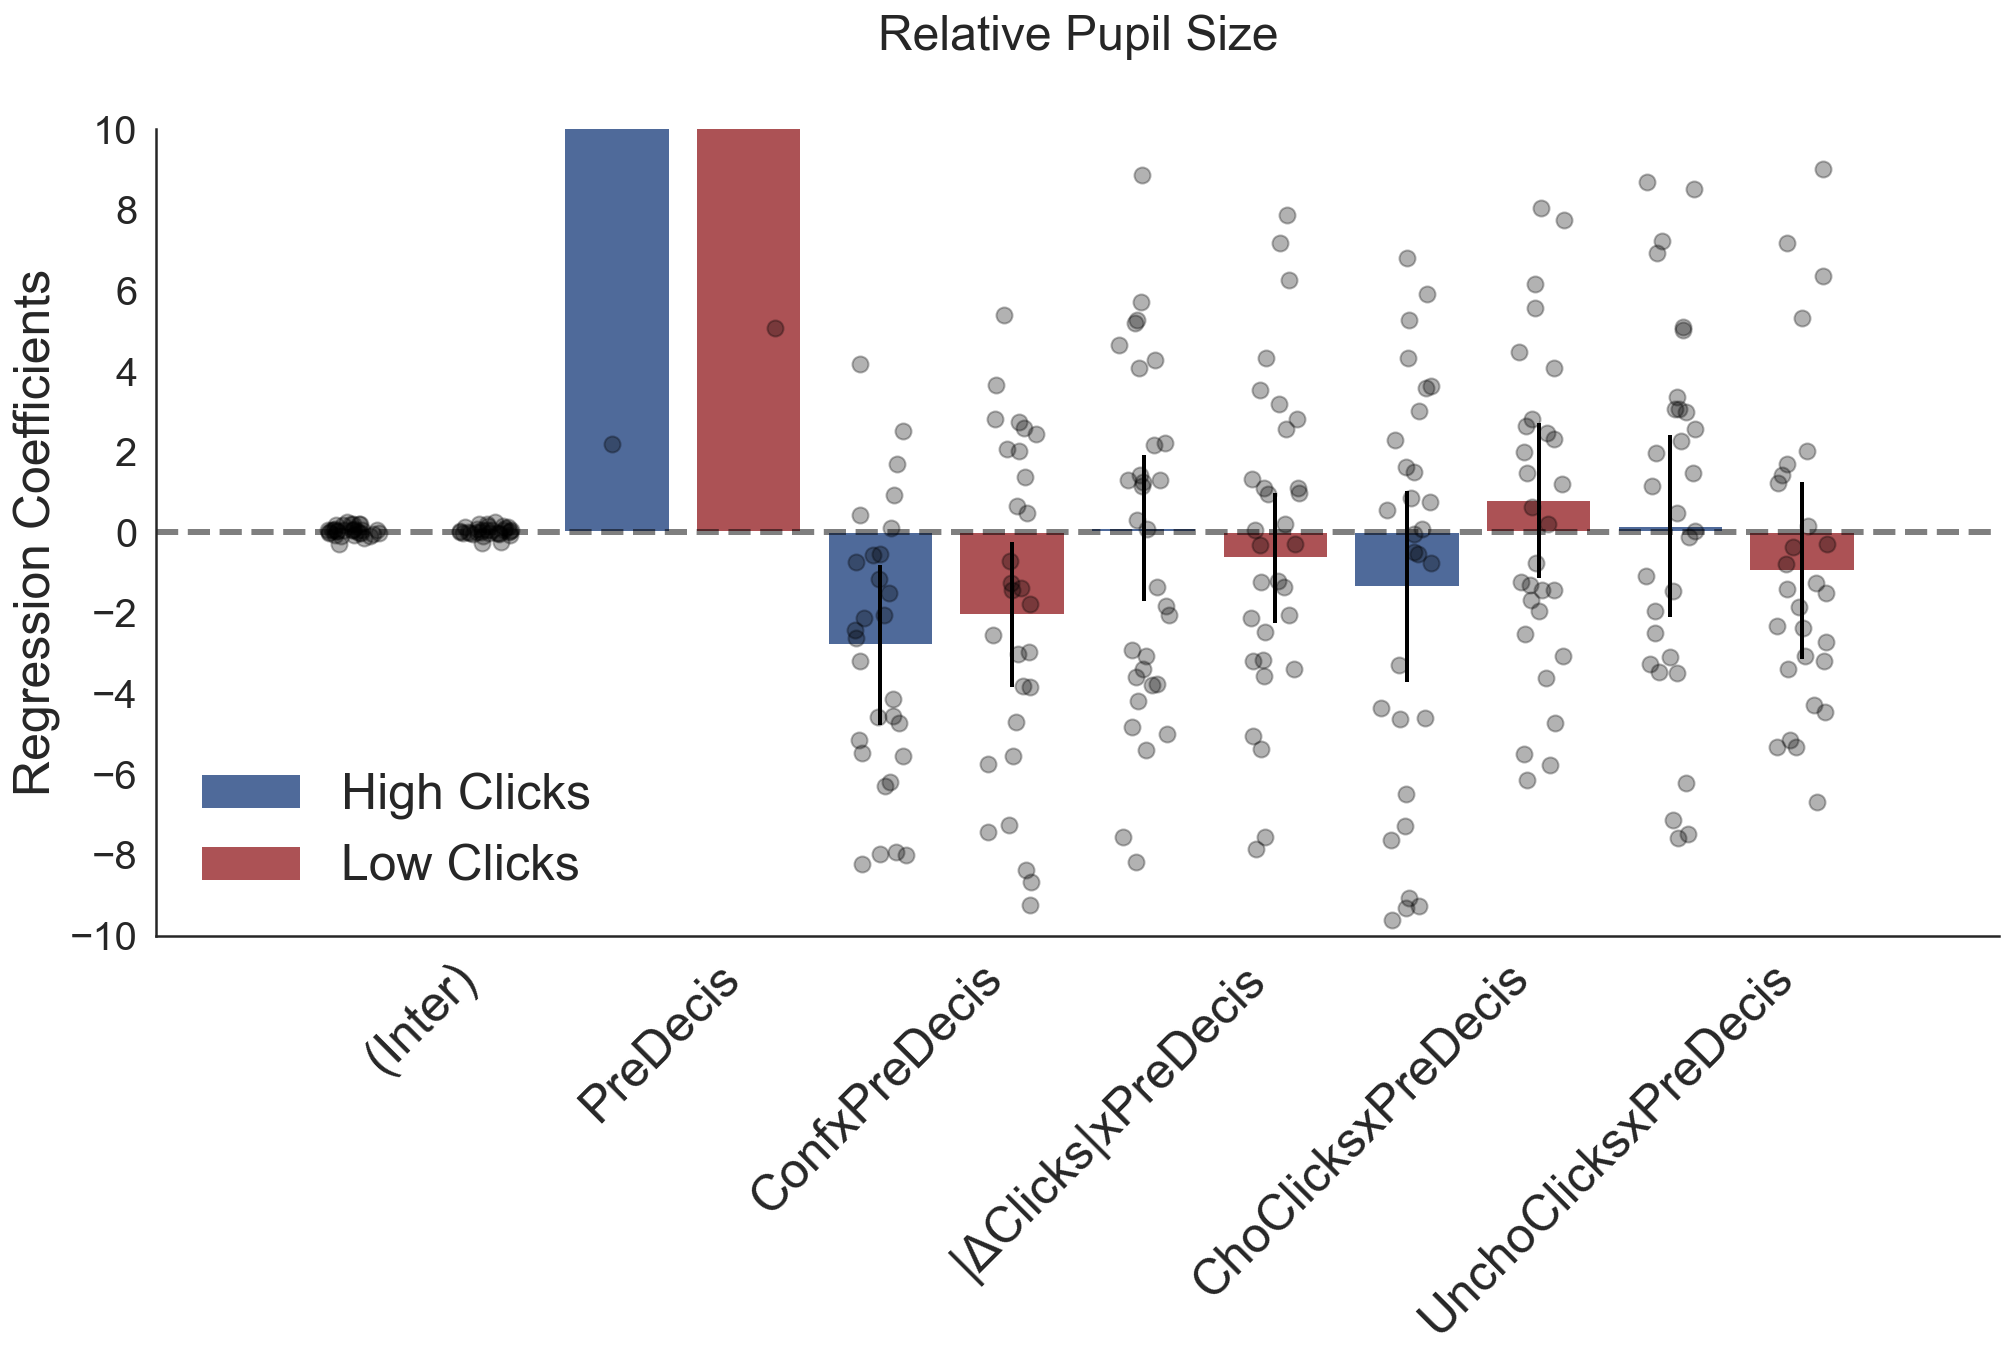

In [145]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis','UnchoClicksxPreDecis'], rotation=45)

([<matplotlib.axis.XTick at 0x7fc7da1766a0>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'PreDecis'),
  Text(3.25, 0, 'ConfxPreDecis'),
  Text(4.25, 0, '|ΔClicks|xPreDecis'),
  Text(5.25, 0, 'ChoClicksxPreDecis'),
  Text(6.25, 0, 'UnchoClicksxPreDecis')])

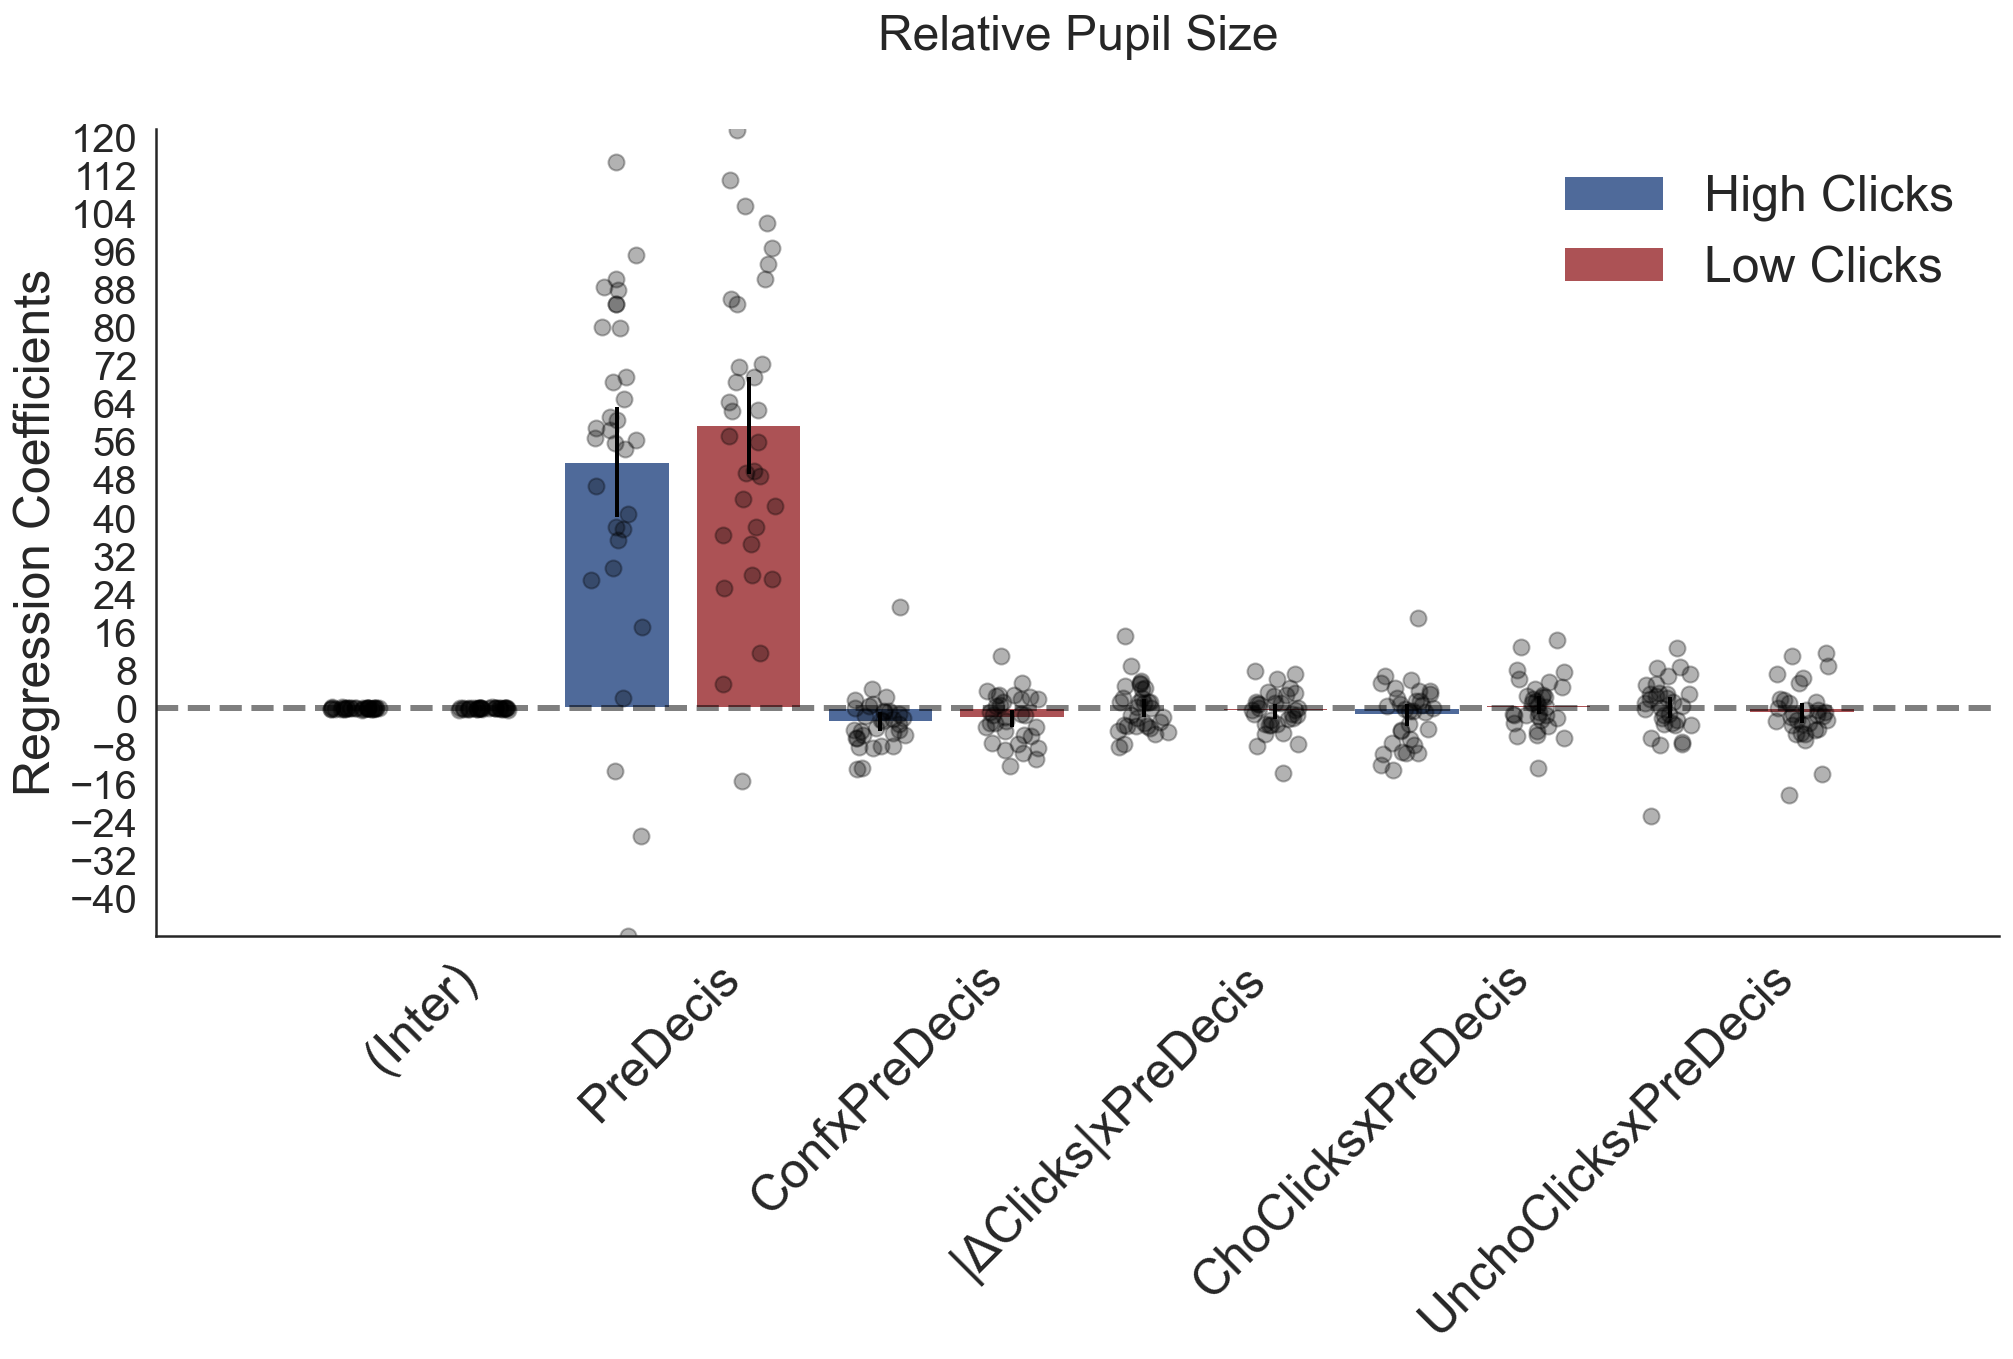

In [146]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis','UnchoClicksxPreDecis'], rotation=45)

In [147]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

Ttest_relResult(statistic=-1.2416353958699304, pvalue=0.2236838461400293)

In [148]:
stats.ttest_rel(par_table_data1.uChoCxPreDecis.values,par_table_data2.uChoCxPreDecis.values)

Ttest_relResult(statistic=0.6379862937101317, pvalue=0.5281675596500846)

In [149]:
print(np.mean(par_table_data1.ChoCxPreDecis.values))
print(np.mean(par_table_data2.ChoCxPreDecis.values))
print(np.mean(par_table_data1.ChoCxPreDecis.values) - np.mean(par_table_data2.ChoCxPreDecis.values))

-1.3435927798486789
0.7990473496065558
-2.1426401294552346


In [150]:
print(np.mean(par_table_data1.uChoCxPreDecis.values))
print(np.mean(par_table_data2.uChoCxPreDecis.values))
print(np.mean(par_table_data1.uChoCxPreDecis.values) - np.mean(par_table_data2.uChoCxPreDecis.values))

0.15693573201390087
-0.9567267020489266
1.1136624340628276


In [ ]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~  PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis + (PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


In [ ]:
table_data1

In [ ]:
table_data2

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis','UnchoClicksxPreDecis'], rotation=45)

In [ ]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

In [ ]:
stats.ttest_rel(par_table_data1.uChoCxPreDecis.values,par_table_data2.uChoCxPreDecis.values)

In [ ]:
print(np.mean(par_table_data1.ChoCxPreDecis.values))
print(np.mean(par_table_data2.ChoCxPreDecis.values))
print(np.mean(par_table_data1.ChoCxPreDecis.values) - np.mean(par_table_data2.ChoCxPreDecis.values))

In [ ]:
print(np.mean(par_table_data1.uChoCxPreDecis.values))
print(np.mean(par_table_data2.uChoCxPreDecis.values))
print(np.mean(par_table_data1.uChoCxPreDecis.values) - np.mean(par_table_data2.uChoCxPreDecis.values))

# Hierarchical GLM, splitted by frame, include SumEvidence

In [ ]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~  PreDecis + CxPreDecis + DxPreDecis+ SumCxPreDecis + (PreDecis + CxPreDecis + DxPreDecis+ SumCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


In [ ]:
table_data1

In [ ]:
table_data2

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','∑ClicksxPreDecis'], rotation=45)

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','∑ClicksxPreDecis'], rotation=45)

In [ ]:
stats.ttest_rel(par_table_data1.SumCxPreDecis.values,par_table_data2.SumCxPreDecis.values)

In [ ]:
print(np.mean(par_table_data1.SumCxPreDecis.values))
print(np.mean(par_table_data2.SumCxPreDecis.values))
print(np.mean(par_table_data1.SumCxPreDecis.values) - np.mean(par_table_data2.SumCxPreDecis.values))

## -- [end ]

## Import packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [3]:
%%R
library(lme4)
#library(car)
library(optimx)
#library(ggplot2)
library(MASS)
#library(broom)
#library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/pupilPEB2021/PupilClicks_FullParticipants


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




In [4]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [5]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(10,10))

    for x in participants:
        # defining the sub figures
     #       sub={}
     #       sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
     #       sns.kdeplot(data.loc[data['part'] == x, var].values, ax = sub['%s' % x], shade=True)
     #       #if rug==True:
     #       #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
     #       sub['%s' % x].set_title('participant %s' % x)
     #       #sub['%s' % x].set_xlim(xlim)

            sns.kdeplot(data.loc[data['part'] == x, var].values, shade=True)

            
            order += 1
    fig.suptitle(title, fontsize = 25)


### Split variable into participantwise quantiles

In [6]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [7]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r--', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r--', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()
    
    return plt

### Full simple logistic graph (no bins)

In [8]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Regression Coefficients Plot

In [9]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [11]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [13]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [14]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(5, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [15]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(5,5))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='-')
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='-')
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='-')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4,fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70)
    fig.text(-0.01, 0.5, ylab, va='center', rotation='vertical',fontsize = 70)
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [16]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [17]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data_exp1["part"]):
            median_matrix_aux=[]
    
            for j in unique(data_exp1["frame"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['part'] == i]
                Splitdata = Splitdata.loc[Splitdata['frame'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['Trial_Index_',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols

In [18]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [19]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value



def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [20]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, parvar].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data[parvar] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [21]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=True, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0, hatch2 ='',labels = ['',''] ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=24)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    XLim = (0, len(regtable1.columns)+1  )
    YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # else:
   #     XLim = (0, len(regtable1.columns) +1)
   #     YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # if ylimits != ():
    #    YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    
    Coefficients = regtable1.columns
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        # Plot condition 1
        position += 1
        ax.bar(position-bar_sep, regtable1.loc['Estimate', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-bar_sep, regtable1.loc['Estimate', Coefficient],
                    yerr=regtable1.loc['SE', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['Estimate', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+bar_sep, regtable2.loc['Estimate', Coefficient],
                    yerr=regtable2.loc['SE', Coefficient]*1.96, lw=2, color='#000000')


   



   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    coef_num1 = range(0,len(mixtable1)) 
    for i in coef_num1:
        # Plot dots condition 1
        part_coefs = mixtable1.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) ,1 -  bar_sep+jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
    coef_num2 = range(0,len(mixtable2)) 
        
    for i in coef_num2:       
        
        # Plot dots condition 1
        part_coefs = mixtable2.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) , 1 +bar_sep-jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, len(regtable1.columns)+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label

    ax.set_xticklabels(regtable1.columns, rotation=0)        
   
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=25)
    ax.xaxis.set_tick_params(labelsize=25)

    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    

    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],hatch=r'', label=labels[0])
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],hatch=r'', label=labels[1])

    leg = plt.legend(handles=[patch1,patch2],fontsize=25)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    
    sns.despine()